#Imports

In [2]:
import os
import math
import random
import shutil
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
from matplotlib.image import imread
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Polygon
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

#Gestalt Principle of Proximity

##PART 01

###Generate Macro Objects made up of Multiple Micro Objects

Pattern 1: Regular Grid


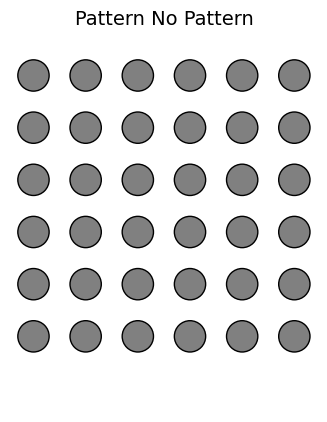

Pattern 2: Increased Horizontal Spacing (I)


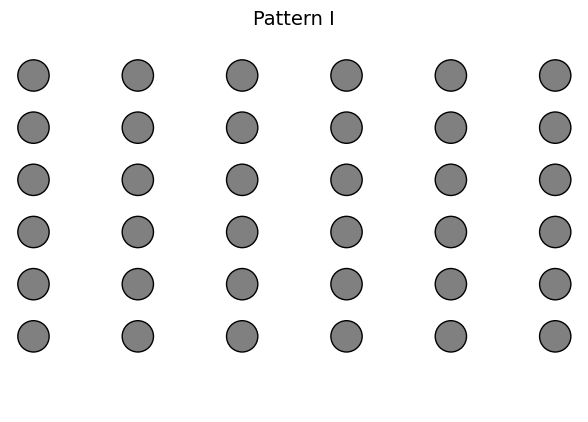

Pattern 3: Increased Vertical Spacing (I)


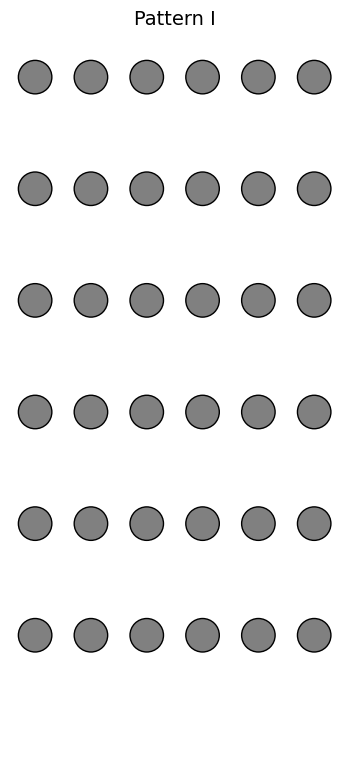

Pattern 4: Decreased Horizontal and Vertical Spacing


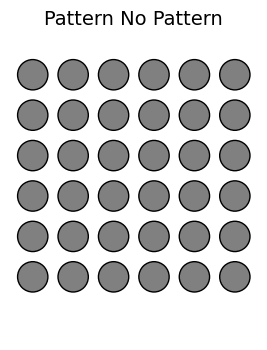

Pattern 5: Grouped Rows (I)


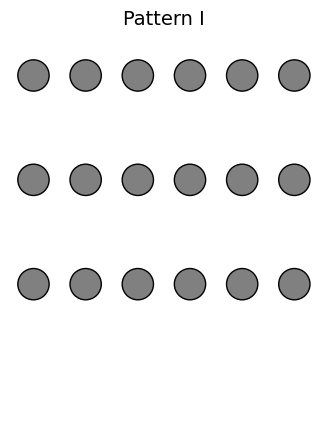

Pattern 6: Grouped Columns (I)


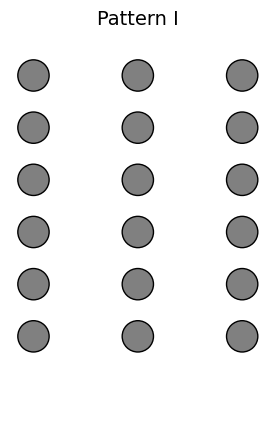

Pattern 7: Regular T (T)


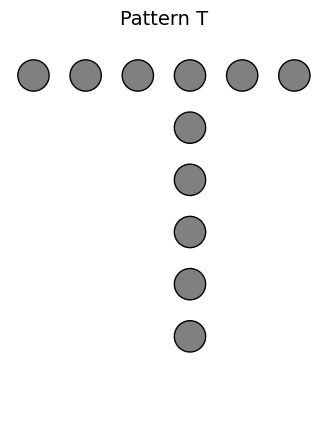

Pattern 8: Tall T (T)


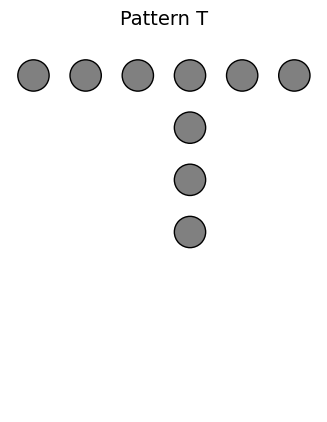

Pattern 9: Thick T (T)


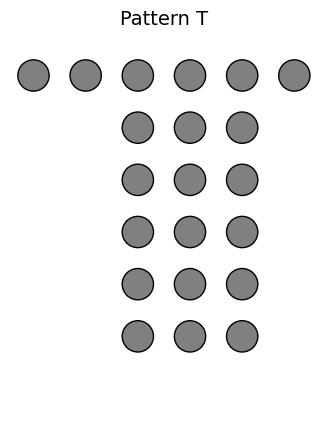

Pattern 10: Three T (T)


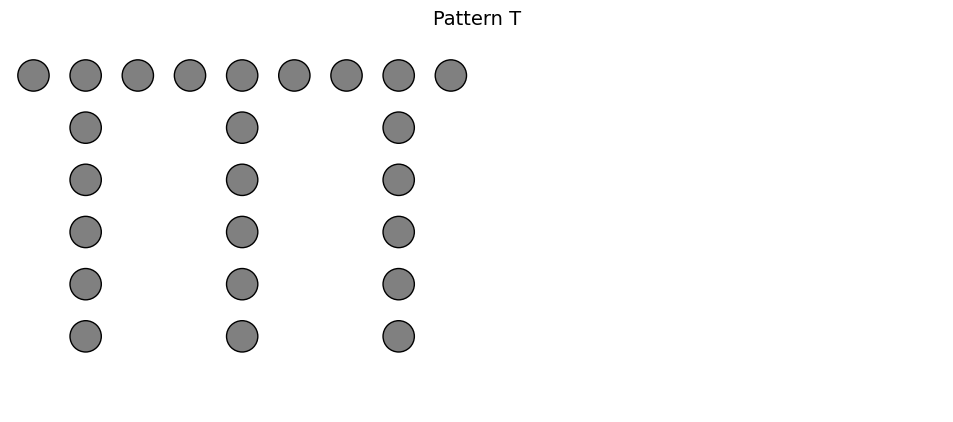

Pattern 11: Basic X (X)


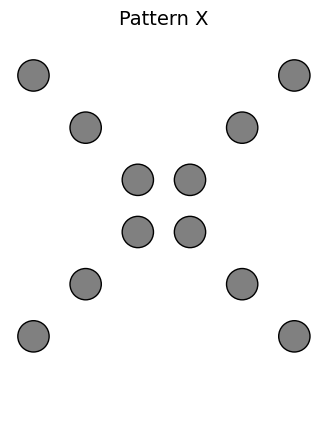

Pattern 12: Smaller X (X)


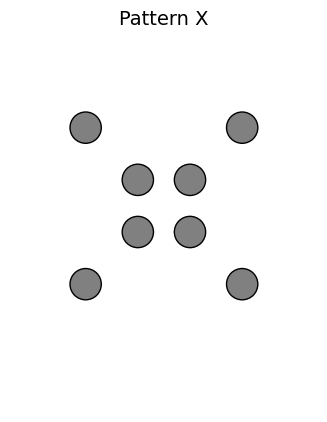

Pattern 13: Three X's Side by Side (XXX)


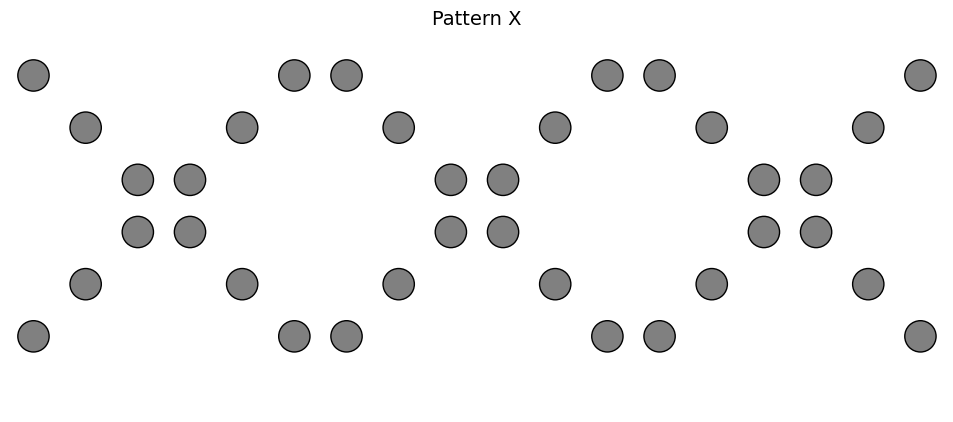

Pattern 14: One Long, One Short Arm X (Short arm length 2)


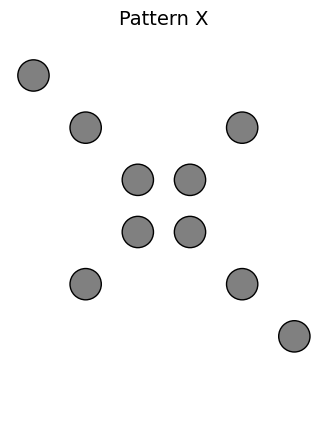

Pattern 15: Left Short, Right Long Arm X (Left arm length 3)


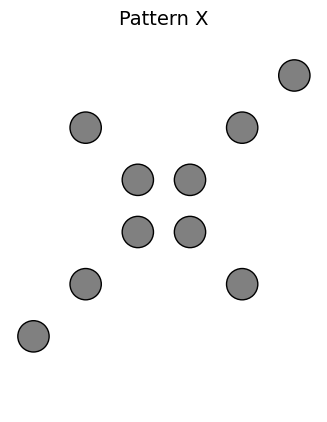

In [3]:
# Function to draw a grid of circles with constant size and varying spacing
def generate_micro_object(label, rows, cols, spacing_h=1, spacing_v=1, hide_mask=None):
    # Dynamically calculate figure size based on spacing to avoid squashing, scale everything down
    scale_factor = 0.6  # Adjust this to control overall scale
    fig, ax = plt.subplots(figsize=(cols * spacing_h * scale_factor, rows * spacing_v * scale_factor))  # Dynamic sizing
    ax.set_aspect('equal')

    radius = 0.3  # Fixed circle radius
    margin = radius * 1.5  # Additional margin to prevent cut-offs

    # Plot each circle based on mask and spacing
    for i in range(rows):
        for j in range(cols):
            if hide_mask is None or hide_mask[i, j] == 0:
                circle = plt.Circle((j * spacing_h, -i * spacing_v), radius, edgecolor='black', facecolor='gray')
                ax.add_artist(circle)

    # Set limits dynamically based on the number of rows and columns, adding margins to prevent cut-off
    ax.set_xlim(-margin, (cols - 1) * spacing_h + margin)
    ax.set_ylim(-rows * spacing_v - margin, margin)

    # Remove plot borders, ticks, and make the background white
    ax.set_xticks([])
    ax.set_yticks([])
    plt.grid(False)
    ax.set_frame_on(False)

    # Add label at the top
    plt.title(f'Pattern {label}', fontsize=14, pad=20)
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()

# Function to generate and display different patterns
def generate_patterns():
    rows, cols = 6, 6

    # Pattern 1: Regular Grid (no label needed)
    print("Pattern 1: Regular Grid")
    generate_micro_object('No Pattern', rows, cols)

    # Pattern 2: Increased Horizontal Spacing, labeled 'I'
    print("Pattern 2: Increased Horizontal Spacing (I)")
    generate_micro_object('I', rows, cols, spacing_h=2)

    # Pattern 3: Increased Vertical Spacing, labeled 'I'
    print("Pattern 3: Increased Vertical Spacing (I)")
    generate_micro_object('I', rows, cols, spacing_v=2)

    # Pattern 4: Decreased Horizontal and Vertical Spacing (no label needed)
    print("Pattern 4: Decreased Horizontal and Vertical Spacing")
    generate_micro_object('No Pattern', rows, cols, spacing_h=0.8, spacing_v=0.8)

    # Pattern 5: Grouped Rows, labeled 'I'
    print("Pattern 5: Grouped Rows (I)")
    generate_micro_object('I', 3, cols, spacing_h=1, spacing_v=2)

    # Pattern 6: Grouped Columns, labeled 'I'
    print("Pattern 6: Grouped Columns (I)")
    generate_micro_object('I', rows, 3, spacing_h=2, spacing_v=1)

    # Pattern 7: Regular T pattern, labeled 'T'
    print("Pattern 7: Regular T (T)")
    hide_mask = np.ones((rows, cols))  # Start with all circles hidden
    hide_mask[0, :] = 0                # Horizontal line of the "T"
    hide_mask[1:, cols // 2] = 0       # Vertical line of the "T"
    generate_micro_object('T', rows, cols, hide_mask=hide_mask)

    # Pattern 8: Tall T pattern, labeled 'T'
    print("Pattern 8: Tall T (T)")
    hide_mask = np.ones((rows, cols))
    hide_mask[0, :] = 0                # Horizontal line of the "T"
    hide_mask[1:4, cols // 2] = 0      # Taller vertical line
    generate_micro_object('T', rows, cols, hide_mask=hide_mask)


    # Pattern 9: Thick T pattern, labeled 'T'
    print("Pattern 9: Thick T (T)")
    hide_mask = np.ones((rows, cols))
    hide_mask[0, :] = 0
    hide_mask[1:, cols // 2 - 1:cols // 2 + 2] = 0  # Thicker vertical line
    generate_micro_object('T', rows, cols, hide_mask=hide_mask)

    # Pattern 10: Three T patterns side by side, labeled 'T'
    print("Pattern 10: Three T (T)")
    hide_mask = np.ones((rows, cols * 3))
    hide_mask[0, 0:3] = 0
    hide_mask[1:, 1] = 0
    hide_mask[0, 3:6] = 0
    hide_mask[1:, 4] = 0
    hide_mask[0, 6:9] = 0
    hide_mask[1:, 7] = 0
    generate_micro_object('T', rows, cols * 3, hide_mask=hide_mask)

    # Pattern 11: Basic X pattern, labeled 'X'
    print("Pattern 11: Basic X (X)")
    hide_mask = np.ones((rows, cols))
    for i in range(rows):
        hide_mask[i, i] = 0
        hide_mask[i, cols - 1 - i] = 0
    generate_micro_object('X', rows, cols, hide_mask=hide_mask)


    # Pattern 12: Smaller X pattern, labeled 'X'
    print("Pattern 12: Smaller X (X)")
    hide_mask = np.ones((rows, cols))
    for i in range(1, rows-1):
        hide_mask[i, i] = 0
        hide_mask[i, cols - i - 1] = 0
    generate_micro_object('X', rows, cols, hide_mask=hide_mask)

    # Pattern 13: Three "X" Shapes Side by Side, labeled 'XXX'
    print("Pattern 13: Three X's Side by Side (XXX)")
    rows, cols = 6, 18
    hide_mask = np.ones((rows, cols))
    for offset in range(0, cols, 6):
        for i in range(rows):
            hide_mask[i, i + offset] = 0
            hide_mask[i, cols // 3 - i - 1 + offset] = 0
    generate_micro_object('X', rows, cols, hide_mask=hide_mask)
    rows,cols = 6,6

    # Pattern 14: One Long, One Short Arm X (with short arm length 2)
    print("Pattern 14: One Long, One Short Arm X (Short arm length 2)")
    hide_mask = np.ones((rows, cols))
    for i in range(rows):
        hide_mask[i, i] = 0
    hide_mask[1, cols - 2] = 0
    hide_mask[2, cols - 3] = 0
    hide_mask[3, cols - 4] = 0
    hide_mask[4, cols - 5] = 0
    generate_micro_object('X', rows, cols, hide_mask=hide_mask)

    # Pattern 15: Left Short, Right Long Arm X (left arm length 3)
    print("Pattern 15: Left Short, Right Long Arm X (Left arm length 3)")
    hide_mask = np.ones((rows, cols))
    hide_mask[1, 1] = 0
    hide_mask[2, 2] = 0
    hide_mask[3, 3] = 0
    hide_mask[4, 4] = 0
    for i in range(rows):
        hide_mask[i, cols - 1 - i] = 0
    generate_micro_object('X', rows, cols, hide_mask=hide_mask)




generate_patterns()

###Generate Datasets from Patterns and Visualize them

In [4]:

# Directory to save dataset
dataset_dir = "pattern_dataset"
os.makedirs(dataset_dir, exist_ok=True)

# Counter for the number of images
image_count = 0

def generate_micro_object(label, rows, cols, spacing_h=1, spacing_v=1, hide_mask=None, jitter=0.1, variation_idx=0):
    global image_count

    # Dynamic sizing with scale factor
    scale_factor = 0.6
    fig, ax = plt.subplots(figsize=(cols * spacing_h * scale_factor, rows * spacing_v * scale_factor))
    ax.set_aspect('equal')

    radius = 0.3  # Circle radius
    margin = radius * 1.5  # Margin to prevent cut-offs

    # Draw circles with jitter
    for i in range(rows):
        for j in range(cols):
            if hide_mask is None or hide_mask[i, j] == 0:
                jitter_x = random.uniform(-jitter, jitter)
                jitter_y = random.uniform(-jitter, jitter)
                circle = plt.Circle((j * spacing_h + jitter_x, -i * spacing_v + jitter_y), radius, edgecolor='black', facecolor='gray')
                ax.add_artist(circle)

    ax.set_xlim(-margin, (cols - 1) * spacing_h + margin)
    ax.set_ylim(-rows * spacing_v - margin, margin)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    plt.grid(False)

    # Save the figure with label and variation index
    filename = f"{label}_{variation_idx}_{image_count}.png"
    plt.savefig(os.path.join(dataset_dir, filename), bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)
    image_count += 1

def generate_macro_objects(num_variations=5):
    rows, cols = 6, 6
    patterns = [
        {'label': 'No Pattern', 'hide_mask': None, 'spacings': [(1, 1), (1.2, 1.2)]},
        {'label': 'I', 'hide_mask': None, 'spacings': [(2, 1), (1, 2)]},
        {'label': 'I', 'hide_mask': None, 'spacings': [(1, 2)]},
        {'label': 'Grouped Columns I', 'hide_mask': None, 'spacings': [(2, 1)]},
        {'label': 'T', 'hide_mask': lambda: create_t_mask(rows, cols), 'spacings': [(1, 1)]},
        {'label': 'Tall T', 'hide_mask': lambda: create_tall_t_mask(rows, cols), 'spacings': [(1, 1)]},
        {'label': 'Thick T', 'hide_mask': lambda: create_thick_t_mask(rows, cols), 'spacings': [(1, 1)]},
        {'label': 'Three T', 'hide_mask': lambda: create_three_t_mask(rows, cols), 'spacings': [(1, 1)]},
        {'label': 'X', 'hide_mask': lambda: create_x_mask(rows, cols), 'spacings': [(1, 1)]},
        {'label': 'Small X', 'hide_mask': lambda: create_small_x_mask(rows, cols), 'spacings': [(1, 1)]},
        {'label': 'Three X', 'hide_mask': lambda: create_three_x_mask(rows, 18), 'spacings': [(1, 1)]},
        {'label': 'Long Short X', 'hide_mask': lambda: create_long_short_x_mask(rows, cols), 'spacings': [(1, 1)]},
        {'label': 'Short Long X', 'hide_mask': lambda: create_short_long_x_mask(rows, cols), 'spacings': [(1, 1)]}
    ]

    for pattern in patterns:
        label = pattern['label']
        hide_mask_func = pattern['hide_mask']
        spacings = pattern['spacings']

        for spacing_h, spacing_v in spacings:
            hide_mask = hide_mask_func() if callable(hide_mask_func) else None
            for variation in range(num_variations):  # Generate multiple variations
                radius_variation = random.uniform(0.25, 0.35)  # Slight radius variation
                jitter = random.uniform(0.05, 0.1)  # Apply jitter
                generate_micro_object(label, rows, cols if label != 'Three X' else 18, spacing_h=spacing_h, spacing_v=spacing_v,
                                     hide_mask=hide_mask, jitter=jitter, variation_idx=variation)

def create_t_mask(rows, cols):
    mask = np.ones((rows, cols))
    mask[0, :] = 0
    mask[1:, cols // 2] = 0
    return mask

def create_tall_t_mask(rows, cols):
    mask = np.ones((rows, cols))
    mask[0, :] = 0
    mask[1:4, cols // 2] = 0
    return mask

def create_thick_t_mask(rows, cols):
    mask = np.ones((rows, cols))
    mask[0, :] = 0
    mask[1:, cols // 2 - 1:cols // 2 + 2] = 0
    return mask

def create_three_t_mask(rows, cols):
    mask = np.ones((rows, cols * 3))
    for offset in range(0, cols * 3, cols):
        mask[0, offset:offset + 3] = 0
        mask[1:, offset + 1] = 0
    return mask

def create_x_mask(rows, cols):
    mask = np.ones((rows, cols))
    for i in range(rows):
        mask[i, i] = 0
        mask[i, cols - 1 - i] = 0
    return mask

def create_small_x_mask(rows, cols):
    mask = np.ones((rows, cols))
    for i in range(1, rows - 1):
        mask[i, i] = 0
        mask[i, cols - 1 - i] = 0
    return mask

def create_three_x_mask(rows, cols):
    mask = np.ones((rows, cols))
    for offset in range(0, cols, 6):
        for i in range(rows):
            mask[i, i + offset] = 0
            mask[i, cols // 3 - i - 1 + offset] = 0
    return mask

def create_long_short_x_mask(rows, cols):
    mask = np.ones((rows, cols))
    for i in range(rows):
        mask[i, i] = 0
    mask[1, cols - 2] = 0
    mask[2, cols - 3] = 0
    mask[3, cols - 4] = 0
    mask[4, cols - 5] = 0
    return mask

def create_short_long_x_mask(rows, cols):
    mask = np.ones((rows, cols))
    mask[1, 1] = 0
    mask[2, 2] = 0
    mask[3, 3] = 0
    mask[4, 4] = 0
    return mask

generate_macro_objects(num_variations=5)
print(f"Total images generated: {image_count}")


Total images generated: 75


###Renaming Labels (Required beacuse of the way I implemented generation of datasets step)

In [5]:


# Define the mappings of old labels to new labels
label_mappings = {
    'Grouped Columns I': 'I',
    'Tall T': 'T',
    'Thick T': 'T',
    'Three T': 'T',
    'Small X': 'X',
    'Three X': 'X',
    'Long Short X': 'X',
    'Short Long X': 'X'
}

# Rename files in the dataset directory
for filename in os.listdir(dataset_dir):
    # Check if the file name contains any of the old labels
    for old_label, new_label in label_mappings.items():
        if filename.startswith(old_label):
            # Generate the new filename with the updated label
            new_filename = filename.replace(old_label, new_label, 1)
            # Rename the file
            os.rename(os.path.join(dataset_dir, filename), os.path.join(dataset_dir, new_filename))
            print(f"Renamed '{filename}' to '{new_filename}'")


Renamed 'Grouped Columns I_0_25.png' to 'I_0_25.png'
Renamed 'Three T_1_46.png' to 'T_1_46.png'
Renamed 'Small X_2_57.png' to 'X_2_57.png'
Renamed 'Three T_2_47.png' to 'T_2_47.png'
Renamed 'Short Long X_1_71.png' to 'X_1_71.png'
Renamed 'Grouped Columns I_1_26.png' to 'I_1_26.png'
Renamed 'Small X_3_58.png' to 'X_3_58.png'
Renamed 'Long Short X_3_68.png' to 'X_3_68.png'
Renamed 'Thick T_2_42.png' to 'T_2_42.png'
Renamed 'Three X_2_62.png' to 'X_2_62.png'
Renamed 'Thick T_0_40.png' to 'T_0_40.png'
Renamed 'Thick T_3_43.png' to 'T_3_43.png'
Renamed 'Thick T_4_44.png' to 'T_4_44.png'
Renamed 'Tall T_0_35.png' to 'T_0_35.png'
Renamed 'Tall T_3_38.png' to 'T_3_38.png'
Renamed 'Three T_0_45.png' to 'T_0_45.png'
Renamed 'Tall T_4_39.png' to 'T_4_39.png'
Renamed 'Three T_3_48.png' to 'T_3_48.png'
Renamed 'Three X_4_64.png' to 'X_4_64.png'
Renamed 'Thick T_1_41.png' to 'T_1_41.png'
Renamed 'Tall T_1_36.png' to 'T_1_36.png'
Renamed 'Three X_0_60.png' to 'X_0_60.png'
Renamed 'Short Long X_2_72.p

###Visualise Dataset

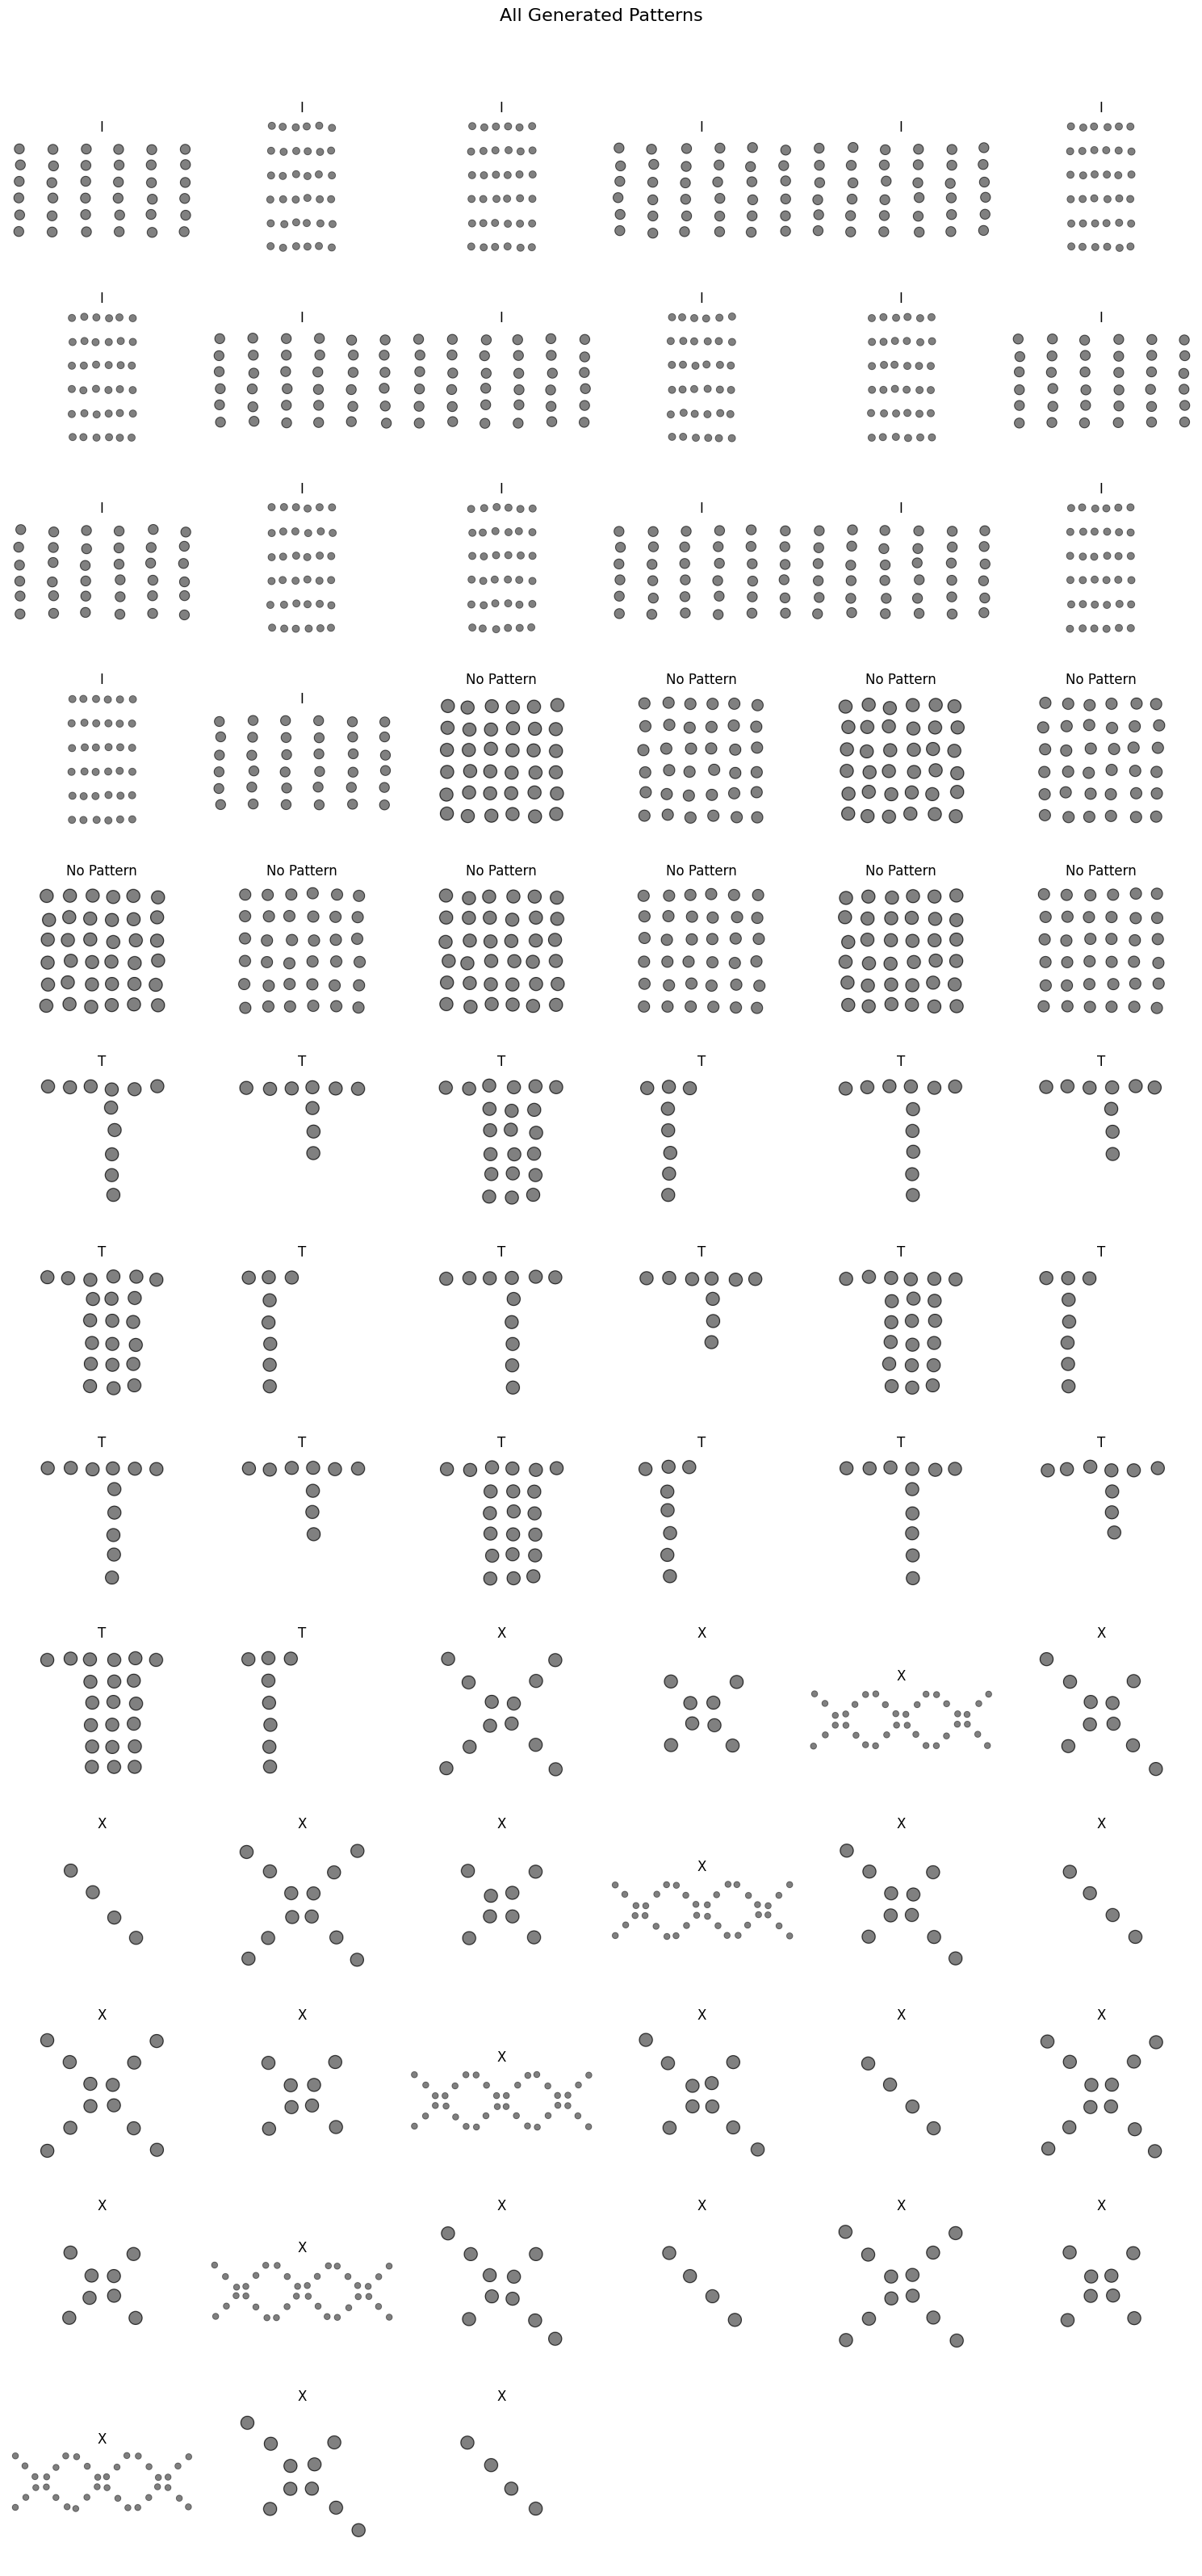

In [6]:
#Display dataset


dataset_dir = "pattern_dataset"
images = os.listdir(dataset_dir)

images.sort()

num_images = len(images)
num_cols = 6
num_rows = math.ceil(num_images / num_cols)


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 2.5))
fig.suptitle("All Generated Patterns", fontsize=16)

for idx, img_name in enumerate(images):
    img_path = os.path.join(dataset_dir, img_name)
    img = Image.open(img_path)
    ax = axes[idx // num_cols, idx % num_cols]
    ax.imshow(img)
    ax.set_title(img_name.split('_')[0])  # Display label
    ax.axis('off')

for j in range(idx + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


###Definition and Training of Convolutional Neural Network Model






In [7]:
dataset_dir = "pattern_dataset"
label_mappings = {"No Pattern": 0, "I": 1, "T": 2, "X": 3}
image_size = (64, 64)  # Resize all images to 64x64

# Load images and labels
images = []
labels = []

for filename in tqdm(os.listdir(dataset_dir)):
    if filename.endswith(".png"):
        # Open image, convert to grayscale and resize
        img = Image.open(os.path.join(dataset_dir, filename)).convert("L")
        img = img.resize(image_size)
        images.append(np.array(img))

        # Extract label from the filename and convert to numerical label
        label_str = filename.split("_")[0]
        label = label_mappings.get(label_str, None)
        if label is not None:
            labels.append(label)

# Convert lists to numpy arrays
images = np.array(images).reshape(-1, image_size[0], image_size[1], 1)  # Add channel dimension
labels = np.array(labels)

# Normalize images
images = images / 255.0
labels = to_categorical(labels, num_classes=len(label_mappings))


100%|██████████| 75/75 [00:00<00:00, 418.02it/s]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print(X_train.shape[0], X_test.shape[0])

60 15


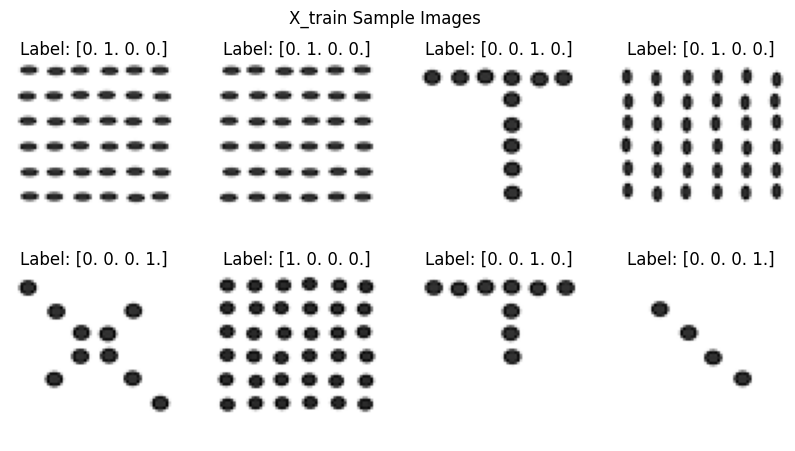

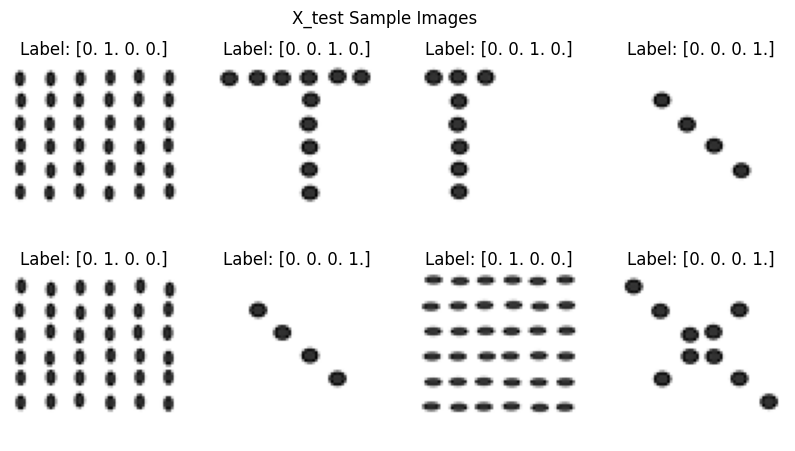

In [14]:
# Display function to show a grid of images
def display_images(images, labels, title, num_images=8):
    plt.figure(figsize=(10, 5))
    plt.suptitle(title)
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# Display some images from X_train and X_test
display_images(X_train, y_train, "X_train Sample Images")
display_images(X_test, y_test, "X_test Sample Images")


In [15]:
#Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)


In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_mappings), activation='softmax')
])


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
batch_size = 32
epochs = 100

history = model.fit(

                    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    epochs=epochs
)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 479ms/step - accuracy: 0.1965 - loss: 1.4339 - val_accuracy: 0.2667 - val_loss: 1.4257
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.3984 - loss: 1.3223 - val_accuracy: 0.2667 - val_loss: 1.4208
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.3754 - loss: 1.3766 - val_accuracy: 0.2667 - val_loss: 1.4084
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.3190 - loss: 1.3168 - val_accuracy: 0.2667 - val_loss: 1.4070
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.3421 - loss: 1.3347 - val_accuracy: 0.2667 - val_loss: 1.4241
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.2397 - loss: 1.3512 - val_accuracy: 0.2667 - val_loss: 1.4285
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.3746 - loss: 1.3181 - val_accuracy: 0.2667 - val_loss: 1.4137
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.2514 - loss: 1.3485 - val_accuracy: 0.2667 - v

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 0.1190
Test Accuracy: 1.0000


###Testing Model Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


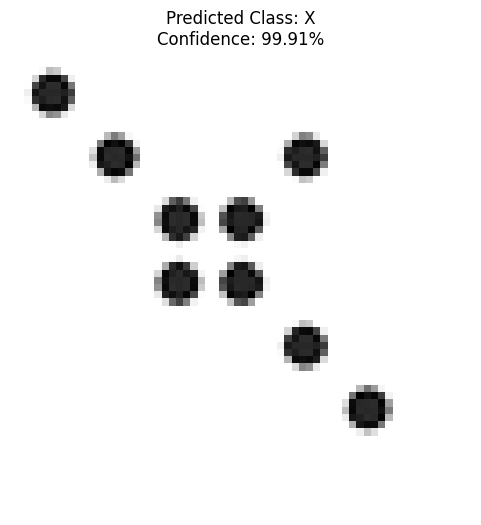


Detailed Predictions:
No Pattern: 0.00%
I: 0.00%
T: 0.09%
X: 99.91%


In [20]:
def create_test_x_pattern(rows=6, cols=6, radius=0.3):
    # Create a new figure with white background
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.set_aspect('equal')

    # Set background to white
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')

    # Draw long diagonal arm
    for i in range(rows):
        circle = plt.Circle((i, -i), radius, edgecolor='black', facecolor='gray')
        ax.add_artist(circle)

    # Draw short diagonal arm (only 3 circles)
    for i in range(1, 4):
        circle = plt.Circle((cols-i-1, -i), radius, edgecolor='black', facecolor='gray')
        ax.add_artist(circle)

    # Set limits and remove axes
    margin = radius * 1.5
    ax.set_xlim(-margin, cols + margin)
    ax.set_ylim(-rows - margin, margin)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    # Save to a temporary file and read back as array
    plt.savefig('temp_test.png', bbox_inches='tight', pad_inches=0.1, dpi=64)
    plt.close()

    # Load the image and preprocess
    test_image = Image.open('temp_test.png').convert('L')
    test_image = test_image.resize(image_size)
    test_array = np.array(test_image).reshape(1, image_size[0], image_size[1], 1)
    test_array = test_array / 255.0

    return test_array, test_image

# Create test image
test_array, test_image = create_test_x_pattern()

# Make prediction
prediction = model.predict(test_array)

# Get predicted class
predicted_class = np.argmax(prediction[0])

# Map class index back to label
reverse_label_mappings = {v: k for k, v in label_mappings.items()}
predicted_label = reverse_label_mappings[predicted_class]

# Display test image and prediction
plt.figure(figsize=(6, 6))
plt.imshow(test_image, cmap='gray')
plt.title(f'Predicted Class: {predicted_label}\nConfidence: {prediction[0][predicted_class]:.2%}')
plt.axis('off')
plt.show()

# Print detailed probabilities for all classes
print("\nDetailed Predictions:")
for label, idx in label_mappings.items():
    print(f"{label}: {prediction[0][idx]:.2%}")

##PART 02

###Increasing the Spacing Between Micro Objects

In [21]:
random.seed(42)
np.random.seed(42)

###Generating datasets with increased spacing between micro objects

In [22]:


def draw_circles_pattern(label, rows, cols, spacing_h=1, spacing_v=1, hide_mask=None, jitter=0.1, variation_idx=0, save_dir=None):
    # Dynamic sizing with scale factor
    scale_factor = 0.6
    fig, ax = plt.subplots(figsize=(cols * spacing_h * scale_factor, rows * spacing_v * scale_factor))
    ax.set_aspect('equal')

    radius = 0.3  # Circle radius
    margin = radius * 1.5  # Margin to prevent cut-offs

    # Draw circles with jitter
    for i in range(rows):
        for j in range(cols):
            if hide_mask is None or hide_mask[i, j] == 0:
                jitter_x = random.uniform(-jitter, jitter)
                jitter_y = random.uniform(-jitter, jitter)
                circle = plt.Circle((j * spacing_h + jitter_x, -i * spacing_v + jitter_y),
                                 radius, edgecolor='black', facecolor='gray')
                ax.add_artist(circle)

    ax.set_xlim(-margin, (cols - 1) * spacing_h + margin)
    ax.set_ylim(-rows * spacing_v - margin, margin)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    plt.grid(False)

    # Save the figure with label and variation index
    filename = f"{label}_{variation_idx}.png"
    pattern_dir = os.path.join(save_dir, label.replace(" ", "_"))
    os.makedirs(pattern_dir, exist_ok=True)
    plt.savefig(os.path.join(pattern_dir, filename), bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)

def create_t_mask(rows, cols):
    mask = np.ones((rows, cols))
    mask[0, :] = 0
    mask[1:, cols // 2] = 0
    return mask

def create_tall_t_mask(rows, cols):
    mask = np.ones((rows, cols))
    mask[0, :] = 0
    mask[1:4, cols // 2] = 0
    return mask

def create_thick_t_mask(rows, cols):
    mask = np.ones((rows, cols))
    mask[0, :] = 0
    mask[1:, cols // 2 - 1:cols // 2 + 2] = 0
    return mask

def create_three_t_mask(rows, cols):
    mask = np.ones((rows, cols * 3))
    for offset in range(0, cols * 3, cols):
        mask[0, offset:offset + 3] = 0
        mask[1:, offset + 1] = 0
    return mask

def create_x_mask(rows, cols):
    mask = np.ones((rows, cols))
    for i in range(rows):
        mask[i, i] = 0
        mask[i, cols - 1 - i] = 0
    return mask

def create_small_x_mask(rows, cols):
    mask = np.ones((rows, cols))
    for i in range(1, rows - 1):
        mask[i, i] = 0
        mask[i, cols - 1 - i] = 0
    return mask

def create_three_x_mask(rows, cols):
    mask = np.ones((rows, cols))
    for offset in range(0, cols, 6):
        for i in range(rows):
            mask[i, i + offset] = 0
            mask[i, cols // 3 - i - 1 + offset] = 0
    return mask

def create_long_short_x_mask(rows, cols):
    mask = np.ones((rows, cols))
    for i in range(rows):
        mask[i, i] = 0
    mask[1, cols - 2] = 0
    mask[2, cols - 3] = 0
    mask[3, cols - 4] = 0
    mask[4, cols - 5] = 0
    return mask

def create_short_long_x_mask(rows, cols):
    mask = np.ones((rows, cols))
    mask[1, 1] = 0
    mask[2, 2] = 0
    mask[3, 3] = 0
    mask[4, 4] = 0
    return mask

def generate_pattern_dataset(spacing, base_dir="pattern_datasets", num_variations=5):
    # Create spacing-specific directory
    dataset_dir = os.path.join(base_dir, f"spacing_{spacing}")
    os.makedirs(dataset_dir, exist_ok=True)

    rows, cols = 6, 6
    patterns = [
        {'label': 'No Pattern', 'hide_mask': None, 'spacings': [(1, 1), (1.2, 1.2)]},
        {'label': 'I', 'hide_mask': None, 'spacings': [(2, 1), (1, 2)]},
        {'label': 'Grouped Columns I', 'hide_mask': None, 'spacings': [(2, 1)]},
        {'label': 'T', 'hide_mask': lambda: create_t_mask(rows, cols), 'spacings': [(1, 1)]},
        {'label': 'Tall T', 'hide_mask': lambda: create_tall_t_mask(rows, cols), 'spacings': [(1, 1)]},
        {'label': 'Thick T', 'hide_mask': lambda: create_thick_t_mask(rows, cols), 'spacings': [(1, 1)]},
        {'label': 'Three T', 'hide_mask': lambda: create_three_t_mask(rows, cols), 'spacings': [(1, 1)]},
        {'label': 'X', 'hide_mask': lambda: create_x_mask(rows, cols), 'spacings': [(1, 1)]},
        {'label': 'Small X', 'hide_mask': lambda: create_small_x_mask(rows, cols), 'spacings': [(1, 1)]},
        {'label': 'Three X', 'hide_mask': lambda: create_three_x_mask(rows, 18), 'spacings': [(1, 1)]},
        {'label': 'Long Short X', 'hide_mask': lambda: create_long_short_x_mask(rows, cols), 'spacings': [(1, 1)]},
        {'label': 'Short Long X', 'hide_mask': lambda: create_short_long_x_mask(rows, cols), 'spacings': [(1, 1)]}
    ]

    image_count = 0
    for pattern in patterns:
        label = pattern['label']
        hide_mask_func = pattern['hide_mask']
        base_spacings = pattern['spacings']

        for base_spacing_h, base_spacing_v in base_spacings:
            # Apply the spacing multiplier
            spacing_h = base_spacing_h * spacing
            spacing_v = base_spacing_v * spacing

            hide_mask = hide_mask_func() if callable(hide_mask_func) else None
            for variation in range(num_variations):
                draw_circles_pattern(
                    label,
                    rows,
                    cols if label != 'Three X' else 18,
                    spacing_h=spacing_h,
                    spacing_v=spacing_v,
                    hide_mask=hide_mask,
                    jitter=random.uniform(0.05, 0.1),
                    variation_idx=variation,
                    save_dir=dataset_dir
                )
                image_count += 1

    return image_count




In [23]:
#Generate datasets for multiple spacings.

spacings=[1, 2, 3, 4, 5]
base_dir="pattern_datasets",
num_variations=5
total_images = 0
os.makedirs("pattern_datasets", exist_ok=True)

for spacing in spacings:
    print(f"\nGenerating dataset for spacing {spacing}...")
    images_generated = generate_pattern_dataset(spacing, "pattern_datasets", num_variations)
    total_images += images_generated
    print(f"Generated {images_generated} images for spacing {spacing}")

print(f"\nTotal images generated across all spacings: {total_images}")



Generating dataset for spacing 1...
Generated 70 images for spacing 1

Generating dataset for spacing 2...
Generated 70 images for spacing 2

Generating dataset for spacing 3...
Generated 70 images for spacing 3

Generating dataset for spacing 4...
Generated 70 images for spacing 4

Generating dataset for spacing 5...
Generated 70 images for spacing 5

Total images generated across all spacings: 350


###Renaming Labels (Required beacuse of the way I implemented dataset generation step)

In [25]:


def rename_files_in_directories(base_dir="pattern_datasets"):
    # Process each spacing subdirectory
    for spacing_dir in os.listdir(base_dir):
        spacing_path = os.path.join(base_dir, spacing_dir)
        if not os.path.isdir(spacing_path):
            continue

        # Process each pattern directory
        for pattern_dir in os.listdir(spacing_path):
            pattern_path = os.path.join(spacing_path, pattern_dir)
            if not os.path.isdir(pattern_path):
                continue

            # Get all files in the directory
            files = sorted([f for f in os.listdir(pattern_path) if f.endswith('.png')])

            # Rename files sequentially
            for i, filename in enumerate(files):
                old_file = os.path.join(pattern_path, filename)
                new_filename = f"{pattern_dir}_{i}.png"
                new_file = os.path.join(pattern_path, new_filename)

                if old_file != new_file:  # Only rename if names are different
                    try:
                        os.rename(old_file, new_file)
                        print(f"Renamed {filename} to {new_filename} in {pattern_dir}")
                    except Exception as e:
                        print(f"Error renaming {filename}: {e}")

def clean_empty_directories(base_dir="pattern_datasets"):
    # Process each spacing subdirectory
    for spacing_dir in os.listdir(base_dir):
        spacing_path = os.path.join(base_dir, spacing_dir)
        if not os.path.isdir(spacing_path):
            continue

        # Remove empty directories
        for pattern_dir in list(os.listdir(spacing_path)):
            pattern_path = os.path.join(spacing_path, pattern_dir)
            if os.path.isdir(pattern_path) and not os.listdir(pattern_path):
                os.rmdir(pattern_path)
                print(f"Removed empty directory: {pattern_path}")

print("Starting final renaming process...")
rename_files_in_directories()
print("\nCleaning up empty directories...")
clean_empty_directories()
print("\nFile renaming and cleanup completed!")

Starting final renaming process...

Cleaning up empty directories...

File renaming and cleanup completed!


###Displaying Few Images Corresponding to Different Spacings

Displaying comparison across spacings...


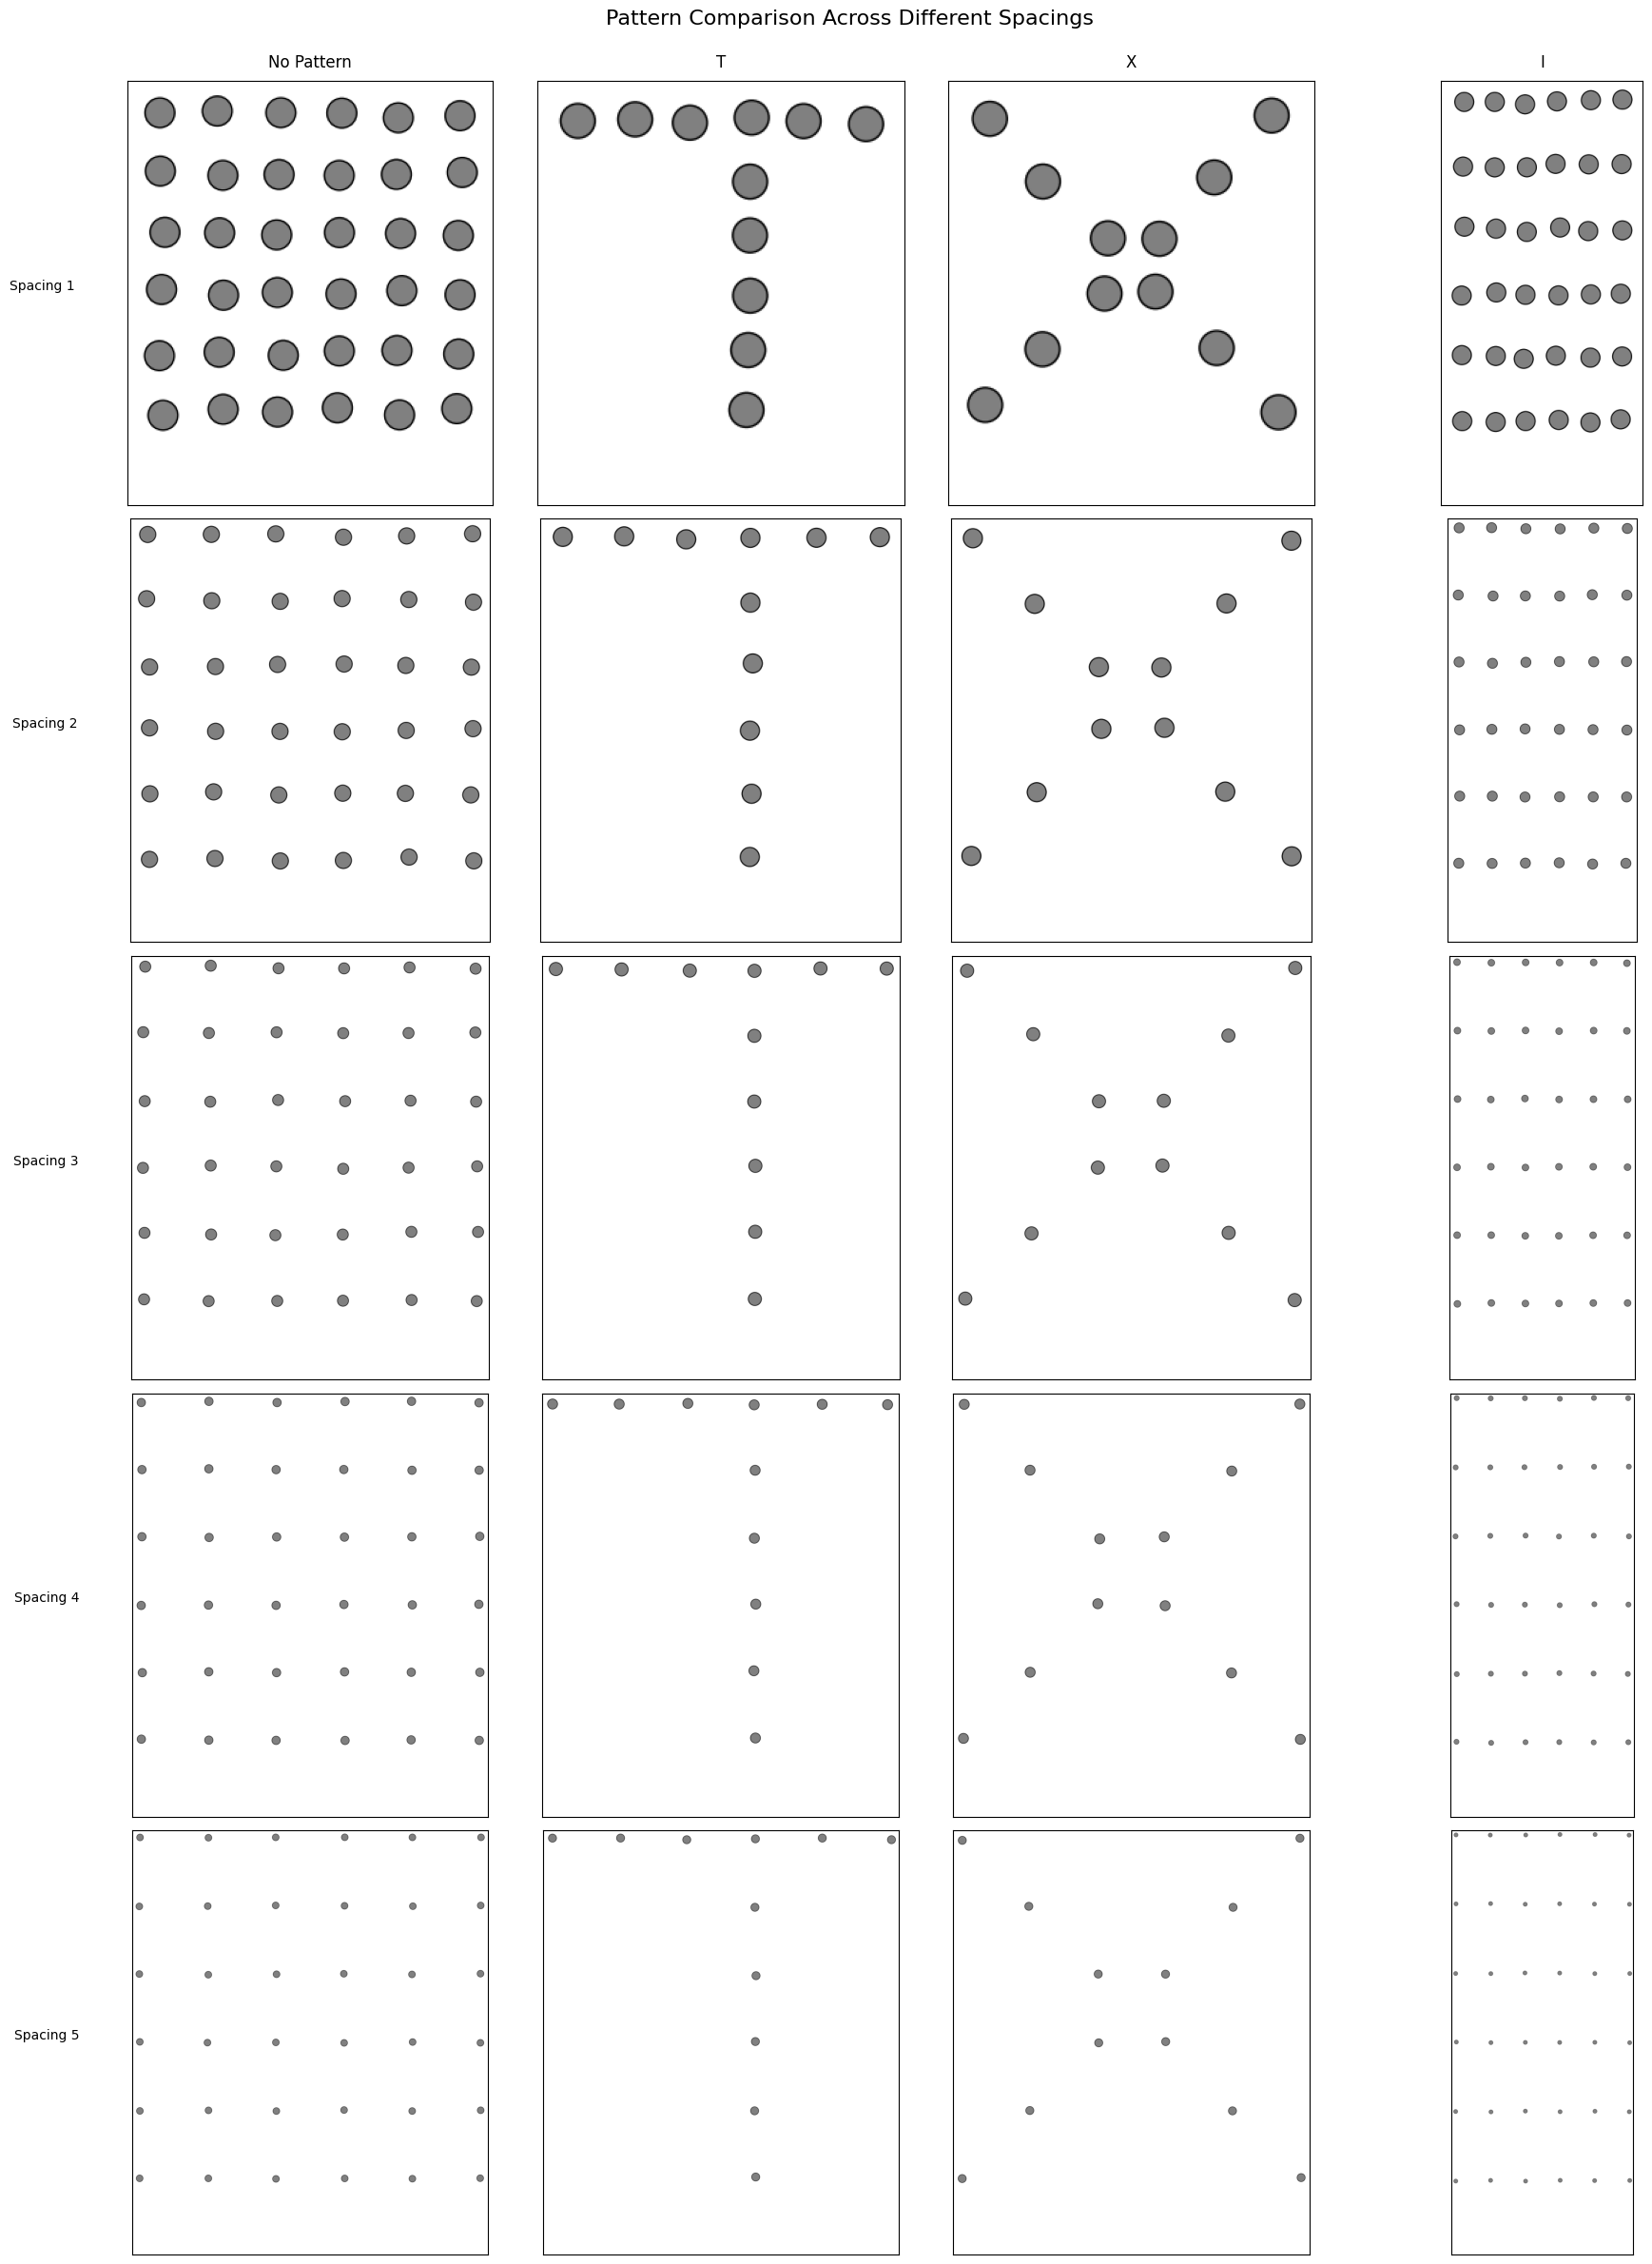

In [28]:
from matplotlib.gridspec import GridSpec


def display_patterns(base_dir="pattern_datasets", patterns_to_show=['No_Pattern', 'T', 'X', 'Three_X']):
    # Set up the figure
    fig = plt.figure(figsize=(20, 25))
    gs = GridSpec(5, len(patterns_to_show), figure=fig)
    fig.suptitle('Pattern Comparison Across Different Spacings', fontsize=16, y=0.95)

    # Spacing directories
    spacings = [1, 2, 3, 4, 5]

    # For each spacing
    for spacing_idx, spacing in enumerate(spacings):
        spacing_dir = f"spacing_{spacing}"
        spacing_path = os.path.join(base_dir, spacing_dir)

        # For each pattern type
        for pattern_idx, pattern in enumerate(patterns_to_show):
            # Create subplot
            ax = fig.add_subplot(gs[spacing_idx, pattern_idx])

            # Find pattern directory
            pattern_dir = os.path.join(spacing_path, pattern)
            if os.path.exists(pattern_dir):
                # Get first pattern file
                pattern_files = [f for f in os.listdir(pattern_dir) if f.endswith('.png')]
                if pattern_files:
                    # Read and display image
                    img_path = os.path.join(pattern_dir, pattern_files[0])
                    img = plt.imread(img_path)
                    ax.imshow(img)

                    # Add titles only at the top
                    if spacing_idx == 0:
                        ax.set_title(f'{pattern.replace("_", " ")}', pad=10)

                    # Add spacing labels on the left
                    if pattern_idx == 0:
                        ax.set_ylabel(f'Spacing {spacing}', rotation=0, labelpad=40, ha='right')

            # Remove axes
            ax.set_xticks([])
            ax.set_yticks([])

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, left=0.1, right=0.98)
    plt.show()

def display_all_variations(base_dir="pattern_datasets", spacing=1, patterns_to_show=['No_Pattern', 'T', 'X', 'Three_X']):
    # Set up the figure
    num_variations = 5  # Number of variations per pattern
    fig = plt.figure(figsize=(20, 5 * len(patterns_to_show)))
    gs = GridSpec(len(patterns_to_show), num_variations, figure=fig)
    fig.suptitle(f'All Variations for Spacing {spacing}', fontsize=16, y=0.95)

    spacing_dir = f"spacing_{spacing}"
    spacing_path = os.path.join(base_dir, spacing_dir)

    # For each pattern type
    for pattern_idx, pattern in enumerate(patterns_to_show):
        pattern_dir = os.path.join(spacing_path, pattern)
        if os.path.exists(pattern_dir):
            # Get all pattern files
            pattern_files = sorted([f for f in os.listdir(pattern_dir) if f.endswith('.png')])

            # Display each variation
            for var_idx in range(min(len(pattern_files), num_variations)):
                ax = fig.add_subplot(gs[pattern_idx, var_idx])
                img_path = os.path.join(pattern_dir, pattern_files[var_idx])
                img = plt.imread(img_path)
                ax.imshow(img)

                # Add titles
                if var_idx == 0:
                    ax.set_ylabel(pattern.replace('_', ' '), rotation=0, labelpad=40, ha='right')
                if pattern_idx == 0:
                    ax.set_title(f'Variation {var_idx + 1}')

                # Remove axes
                ax.set_xticks([])
                ax.set_yticks([])

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, left=0.15)
    plt.show()

# Example usage:

# Define patterns to display
patterns = ['No_Pattern', 'T', 'X', 'I']

print("Displaying comparison across spacings...")

display_patterns(patterns_to_show=patterns)

###Merging Datasets to Form Datasets that Containing Images with Different Spacings Clubbed Together

In [29]:
base_dir="pattern_datasets"
# Define new directory structure
new_dirs = {
    "spacing_1_2": ["spacing_1", "spacing_2"],
    "spacing_1_2_3": ["spacing_1", "spacing_2", "spacing_3"],
    "spacing_1_2_3_4": ["spacing_1", "spacing_2", "spacing_3", "spacing_4"],
    "spacing_1_2_3_4_5": ["spacing_1", "spacing_2", "spacing_3", "spacing_4", "spacing_5"]
}

# Create new directories
for new_dir in new_dirs.keys():
    new_path = os.path.join(base_dir, new_dir)
    os.makedirs(new_path, exist_ok=True)
    print(f"Created directory: {new_path}")

# Copy files to new directories
for new_dir, source_dirs in new_dirs.items():
    new_dir_path = os.path.join(base_dir, new_dir)

    # Copy from each source directory
    for source_dir in source_dirs:
        source_path = os.path.join(base_dir, source_dir)
        if os.path.exists(source_path):
            # Walk through all subdirectories in the source
            for root, dirs, files in os.walk(source_path):
                for dir_name in dirs:
                    # Create corresponding directory structure in destination
                    src_dir = os.path.join(root, dir_name)
                    rel_path = os.path.relpath(src_dir, source_path)
                    dst_dir = os.path.join(new_dir_path, rel_path)
                    os.makedirs(dst_dir, exist_ok=True)

                    # Copy all files from source to destination
                    for file in os.listdir(src_dir):
                        src_file = os.path.join(src_dir, file)
                        dst_file = os.path.join(dst_dir, file)
                        if os.path.isfile(src_file):
                            shutil.copy2(src_file, dst_file)
                            print(f"Copied {src_file} to {dst_file}")

print("\nReorganization complete!")

# Optional: Calculate and display statistics
def count_files(directory):
    total = 0
    for root, dirs, files in os.walk(directory):
        total += len(files)
    return total

print("\nFile counts in new directories:")
for new_dir in new_dirs.keys():
    dir_path = os.path.join(base_dir, new_dir)
    file_count = count_files(dir_path)
    print(f"{new_dir}: {file_count} files")



Created directory: pattern_datasets/spacing_1_2
Created directory: pattern_datasets/spacing_1_2_3
Created directory: pattern_datasets/spacing_1_2_3_4
Created directory: pattern_datasets/spacing_1_2_3_4_5
Copied pattern_datasets/spacing_1/Short_Long_X/Short_Long_X_4.png to pattern_datasets/spacing_1_2/Short_Long_X/Short_Long_X_4.png
Copied pattern_datasets/spacing_1/Short_Long_X/Short_Long_X_0.png to pattern_datasets/spacing_1_2/Short_Long_X/Short_Long_X_0.png
Copied pattern_datasets/spacing_1/Short_Long_X/Short_Long_X_2.png to pattern_datasets/spacing_1_2/Short_Long_X/Short_Long_X_2.png
Copied pattern_datasets/spacing_1/Short_Long_X/Short_Long_X_1.png to pattern_datasets/spacing_1_2/Short_Long_X/Short_Long_X_1.png
Copied pattern_datasets/spacing_1/Short_Long_X/Short_Long_X_3.png to pattern_datasets/spacing_1_2/Short_Long_X/Short_Long_X_3.png
Copied pattern_datasets/spacing_1/Grouped_Columns_I/Grouped_Columns_I_1.png to pattern_datasets/spacing_1_2/Grouped_Columns_I/Grouped_Columns_I_1.

###Training Model for each dataset


1. Dataset with spacing 1
2. Dataset with spacing 1 and 2
3. Dataset with spacing 1,2 and 3
4. Dataset with spacing 1,2,3 and 4
5. Dataset with spacing 1,2,3,4 and 5

In [30]:
base_dir = "pattern_datasets"
spacing_dirs = [
    "spacing_1",
    "spacing_1_2",
    "spacing_1_2_3",
    "spacing_1_2_3_4",
    "spacing_1_2_3_4_5"
]
label_mappings = {"No_Pattern": 0, "I": 1, "T": 2, "X": 3}
image_size = (64, 64)
results = {}

# Process each spacing directory
for spacing_dir in spacing_dirs:
    print(f"\nProcessing {spacing_dir}...")
    dataset_dir = os.path.join(base_dir, spacing_dir)

    # Load images and labels
    images = []
    labels = []

    # Iterate through pattern directories
    for pattern_dir in os.listdir(dataset_dir):
        pattern_path = os.path.join(dataset_dir, pattern_dir)
        if not os.path.isdir(pattern_path):
            continue

        # Get numerical label
        label = label_mappings.get(pattern_dir, None)
        if label is None:
            continue

        # Process all images in the pattern directory
        for filename in os.listdir(pattern_path):
            if filename.endswith(".png"):
                img_path = os.path.join(pattern_path, filename)
                img = Image.open(img_path).convert("L")
                img = img.resize(image_size)
                images.append(np.array(img))
                labels.append(label)

    # Prepare data
    images = np.array(images).reshape(-1, image_size[0], image_size[1], 1)
    labels = np.array(labels)

    # Normalize and convert to categorical
    images = images / 255.0
    labels = to_categorical(labels, num_classes=len(label_mappings))

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        images, labels, test_size=0.2, random_state=42
    )

    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1
    )

    # Create and compile model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(label_mappings), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model
    print(f"\nTraining model for {spacing_dir}...")
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=32),
        validation_data=(X_test, y_test),
        epochs=100,
        verbose=1
    )

    # Store results
    num_spacings = len(spacing_dir.split("_")[1:])
    max_accuracy = max(history.history['val_accuracy'])
    results[num_spacings] = max_accuracy
    print(f"Best validation accuracy for {spacing_dir}: {max_accuracy:.4f}")



# Print final results
print("\nFinal Results:")
for num_spacings, accuracy in results.items():
    print(f"Spacing included upto : {num_spacings}, Best accuracy: {accuracy:.4f}")


Processing spacing_1...

Training model for spacing_1...
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1875 - loss: 1.4082 - val_accuracy: 0.0000e+00 - val_loss: 1.6726
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step - accuracy: 0.3125 - loss: 1.4031 - val_accuracy: 0.0000e+00 - val_loss: 1.6792
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.1250 - loss: 1.4861 - val_accuracy: 0.0000e+00 - val_loss: 1.5568
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.3125 - loss: 1.4006 - val_accuracy: 0.0000e+00 - val_loss: 1.5042
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.2500 - loss: 1.3582 - val_accuracy: 0.0000e+00 - val_loss: 1.4883
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.1875 - loss: 1.3542 - val_accuracy: 0.0000e+00 - val_loss: 1.5090
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.0625 - loss: 1.3724 - val_accuracy: 0.0000e+00 - val_loss: 1.5471
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.3125 - loss: 1.3581 - val_accurac

###Plot

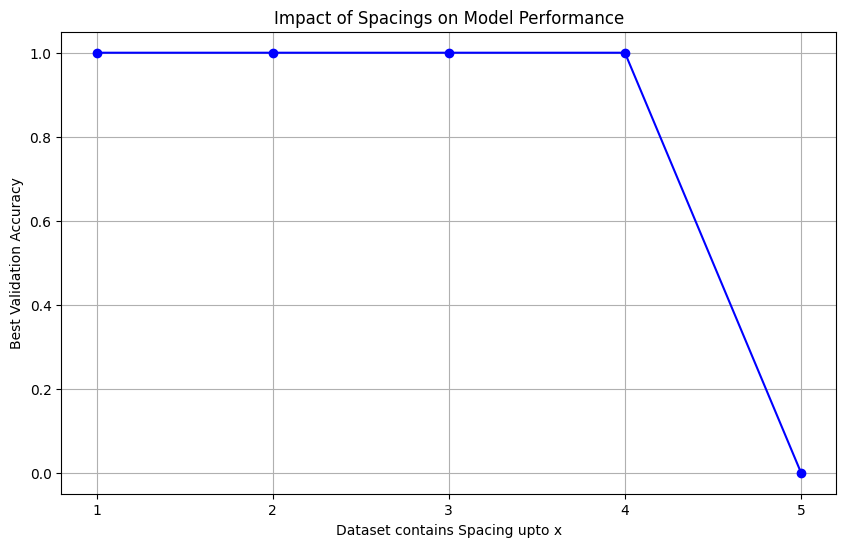

In [31]:
#plot
plt.figure(figsize=(10, 6))
x = list(results.keys())
y = list(results.values())

plt.plot(x, y, 'bo-')
plt.xlabel('Dataset contains Spacing upto x')
plt.ylabel('Best Validation Accuracy')
plt.title('Impact of Spacings on Model Performance')
plt.grid(True)
plt.xticks(x)

# Save results
plt.show()

#Gestalt Principle Of Closure

The Gestalt principle of closure is a visual perception principle that states that when people see a partially complete object, they fill in the blanks to perceive the whole object

**Training Strategy:**
1. Generated synthetic dataset with incomplete shapes (circle, rectangle, triangle, rhombus, hexagon) using three styles:


*   Like a dotted line with missing dots
*   Like a regular line with gaps in it

*   Mixture of both styles together

2. Data augmentation through:

*   Random rotations

*   Size variation
*   Varying number of dots


*   Random gap between dots

**Testing Strategy:**


*   80-20 train-test split, stratified by shape class
* Implemented a Convolutional Neural Network (CNN) with:

  Four sequential convolutional blocks with batch normalization,
Dropout regularization (0.5 rate),
Cross-entropy loss optimization

The essence of the implementation is teaching a model to recognize shapes despite missing information, mirroring how human perception fills in gaps according to the closure principle.












###Generating Incomplete Shapes

#####Shapes made from lines

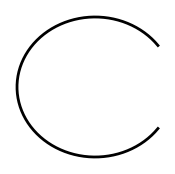

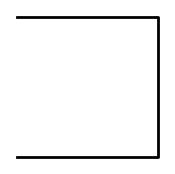

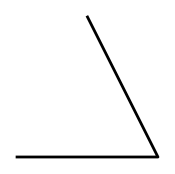

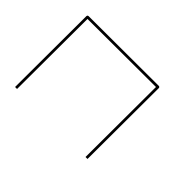

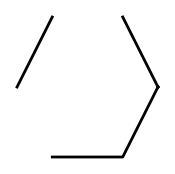

In [33]:
def save_shape(filename, x_points, y_points):
    plt.figure(figsize=(2, 2))
    plt.plot(x_points, y_points, 'k-', lw=2)
    plt.axis('off')
    plt.savefig(os.path.join(output_dir, filename), bbox_inches='tight', pad_inches=0.2)
    plt.show()
    plt.close()

def draw_incomplete_circle():
    theta = np.linspace(0, 2 * np.pi, 100)
    x = np.cos(theta)
    y = np.sin(theta)
    x, y = x[10:90], y[10:90]
    save_shape("incomplete_circle.png", x, y)

def draw_incomplete_rectangle():
    x = [0, 1, 1, 0, np.nan, 0]
    y = [0, 0, 1, 1, np.nan, 0]
    save_shape("incomplete_rectangle.png", x, y)

def draw_incomplete_triangle():
    x = [0, 1, 0.5, np.nan, 0]
    y = [0, 0, np.sqrt(3)/2, np.nan, 0]
    save_shape("incomplete_triangle.png", x, y)

def draw_incomplete_rhombus():
    x = [0, 1, 2, 1, np.nan]
    y = [0, 1.5, 0, -1.5, np.nan]
    save_shape("incomplete_rhombus.png", x, y)

def draw_incomplete_hexagon():
    theta = np.linspace(0, 2 * np.pi, 7)
    x, y = np.cos(theta), np.sin(theta)
    x = np.concatenate((x[:2], [np.nan], x[2:4], [np.nan], x[4:]))
    y = np.concatenate((y[:2], [np.nan], y[2:4], [np.nan], y[4:]))
    save_shape("incomplete_hexagon.png", x, y)

# Define the output directory
output_dir = "incomplete_shapes"
os.makedirs(output_dir, exist_ok=True)

draw_incomplete_circle()
draw_incomplete_rectangle()
draw_incomplete_triangle()
draw_incomplete_rhombus()
draw_incomplete_hexagon()

#####Shapes made from dots

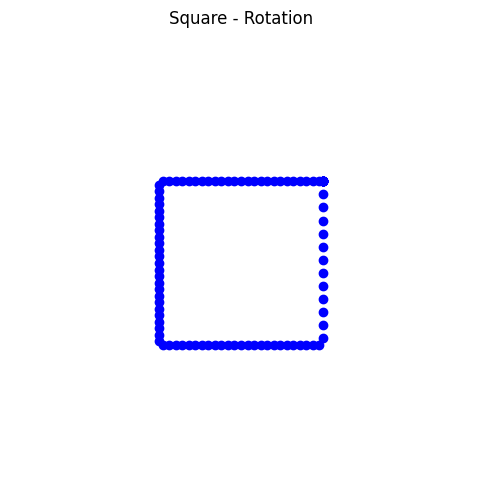

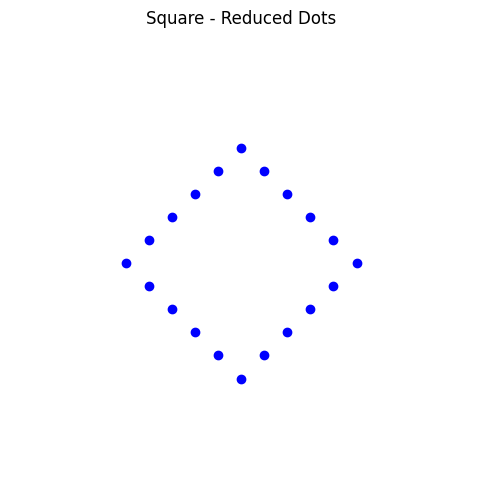

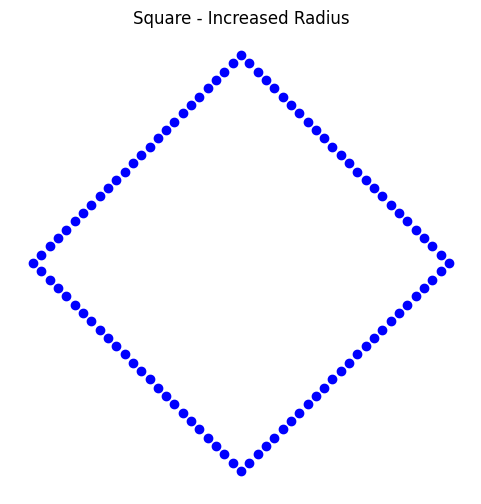

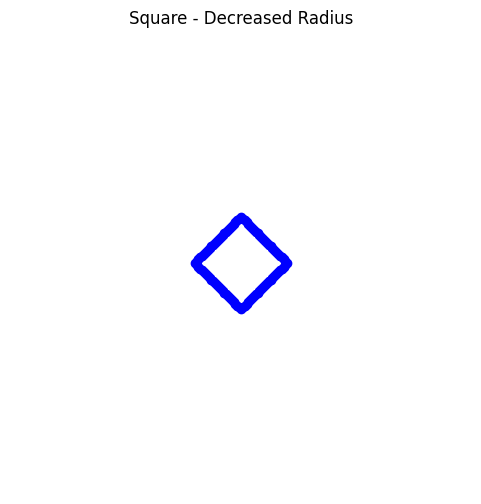

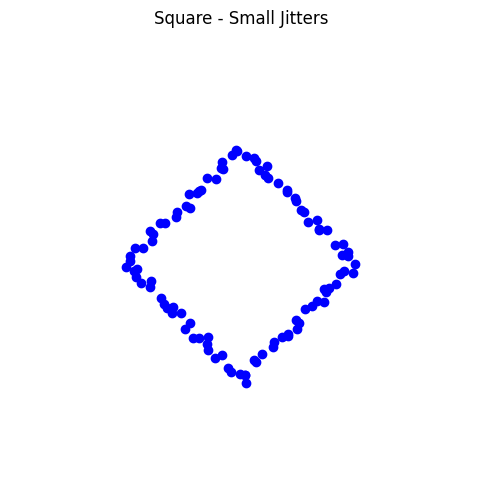

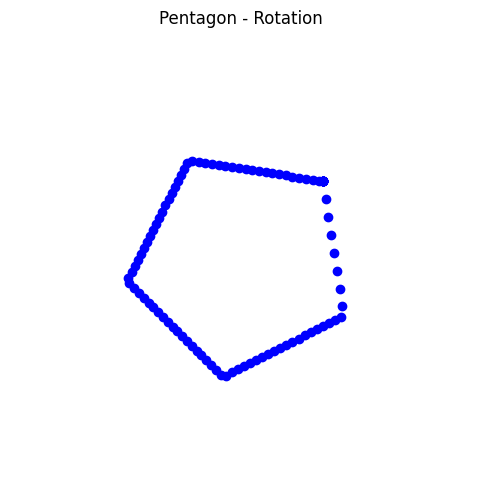

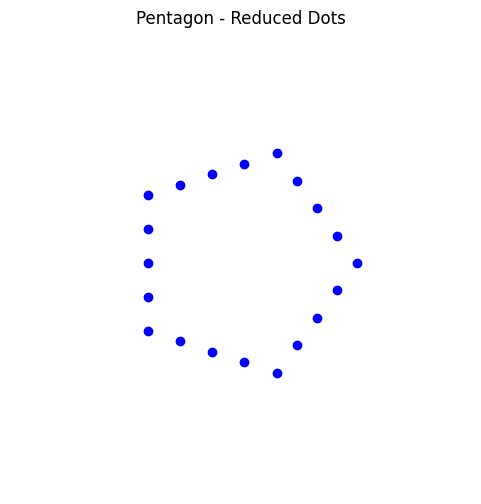

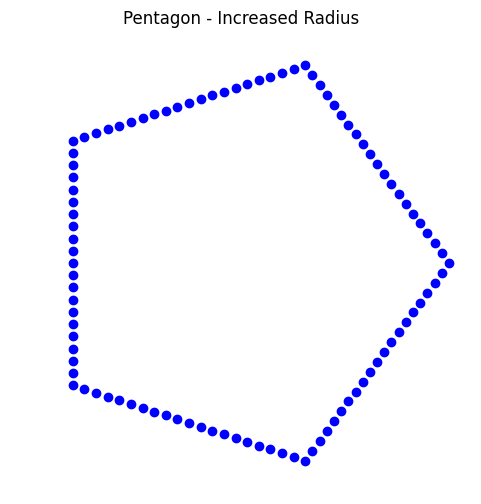

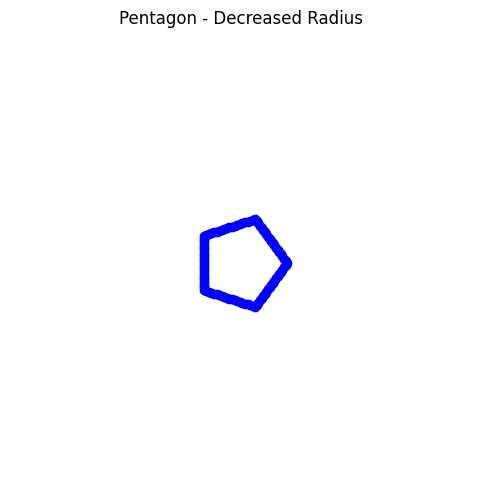

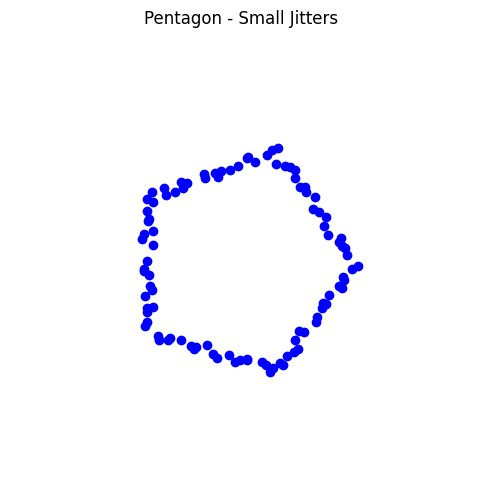

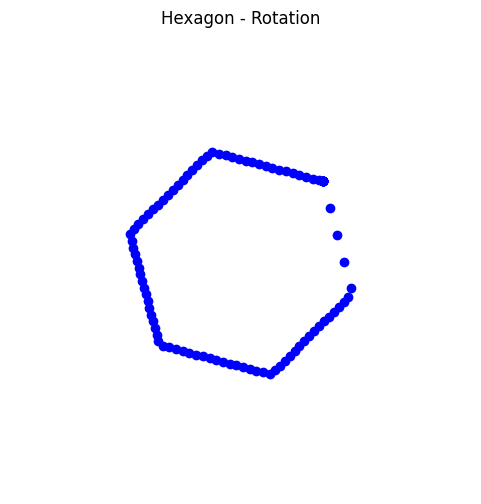

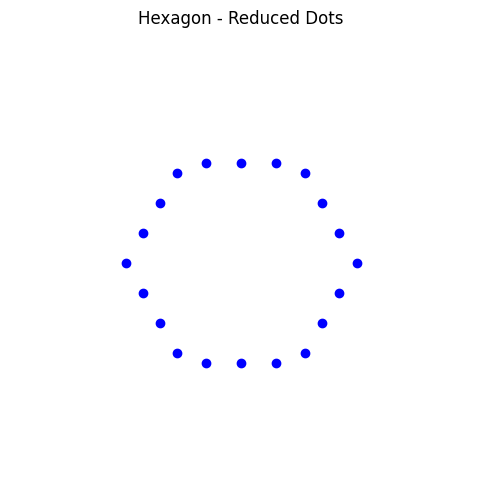

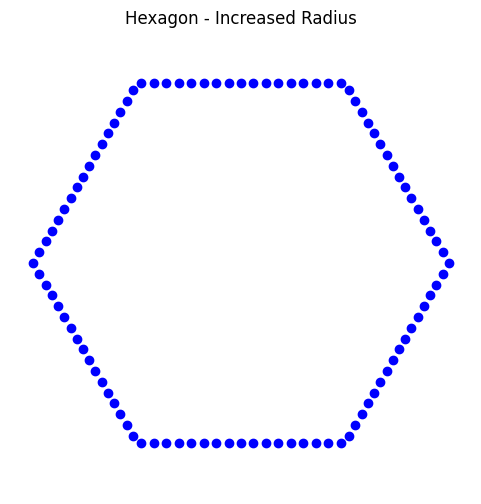

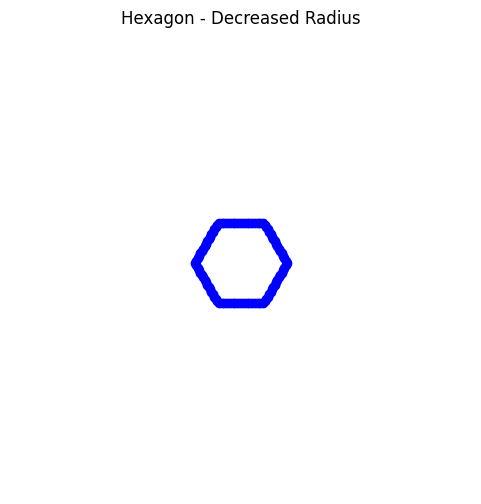

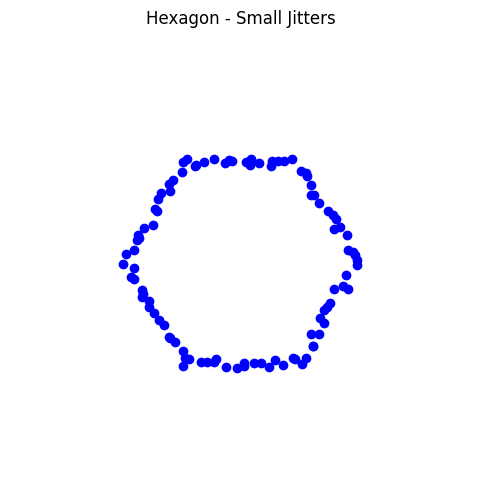

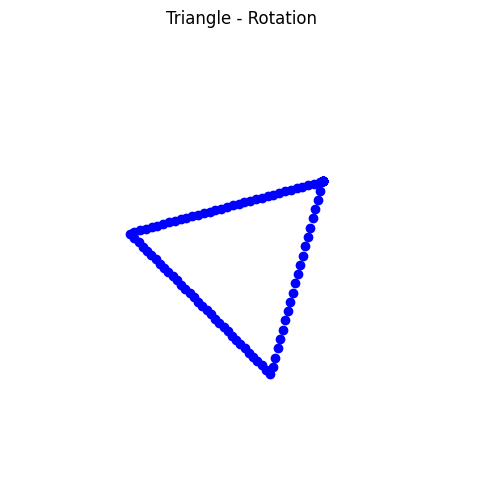

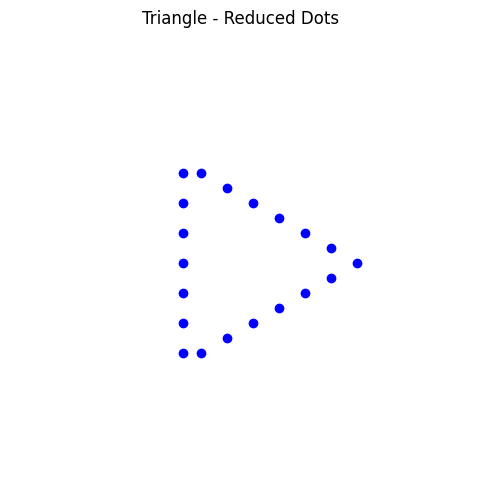

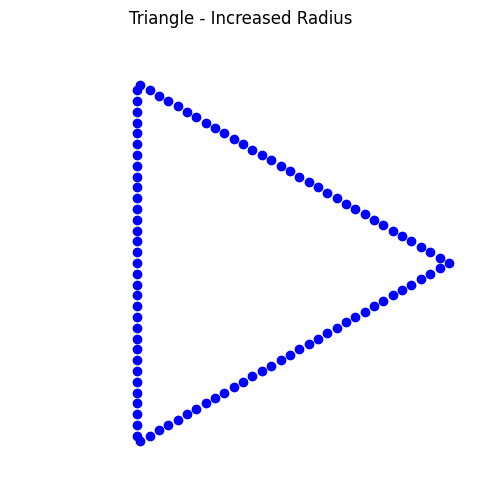

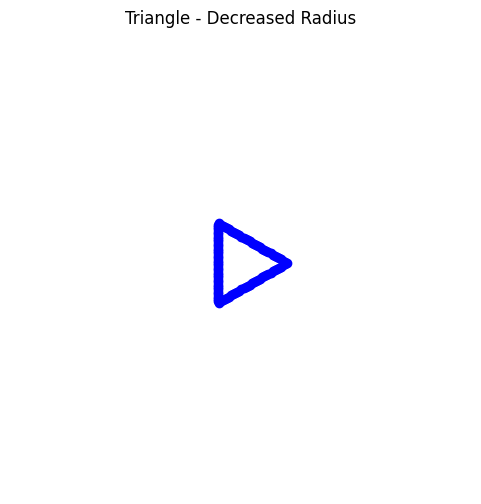

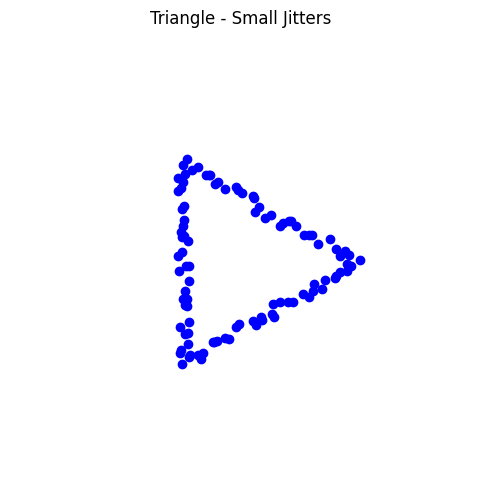

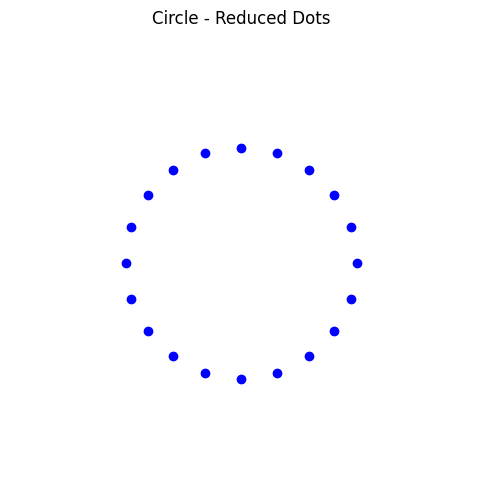

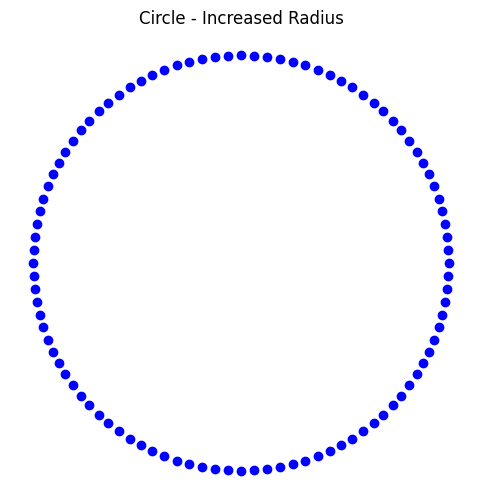

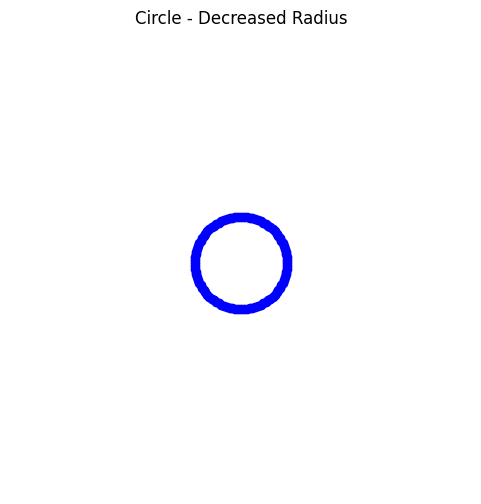

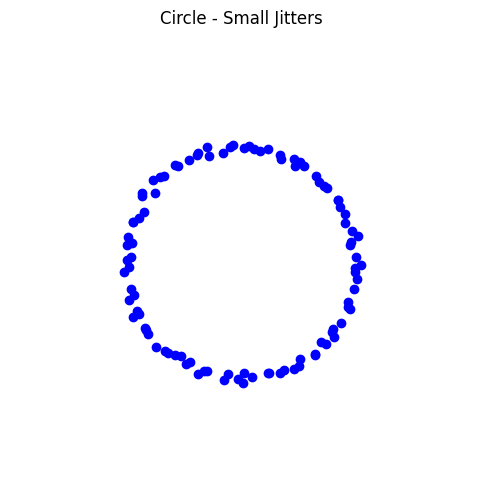

In [34]:


def generate_polygon(n_sides, radius=1, num_dots=100, rotation=0, jitter=0):
    vertices_angles = np.linspace(0, 2 * np.pi, n_sides, endpoint=False) + rotation
    x_vertices = np.cos(vertices_angles) * radius
    y_vertices = np.sin(vertices_angles) * radius
    angles = np.linspace(0, 2 * np.pi, num_dots, endpoint=False)
    dot_x = np.interp(angles, np.append(vertices_angles, 2 * np.pi), np.append(x_vertices, x_vertices[0]))
    dot_y = np.interp(angles, np.append(vertices_angles, 2 * np.pi), np.append(y_vertices, y_vertices[0]))
    dot_x += np.random.uniform(-jitter, jitter, size=dot_x.shape)
    dot_y += np.random.uniform(-jitter, jitter, size=dot_y.shape)
    return dot_x, dot_y

def generate_circle(radius=1, num_dots=100, jitter=0):
    angles = np.linspace(0, 2 * np.pi, num_dots, endpoint=False)
    x = np.cos(angles) * radius
    y = np.sin(angles) * radius
    x += np.random.uniform(-jitter, jitter, size=x.shape)
    y += np.random.uniform(-jitter, jitter, size=y.shape)
    return x, y

def plot_dots(x, y, shape_name):
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, color='blue')
    plt.title(f'{shape_name}')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.grid(True)
    plt.show()

def generate_square(radius=1, num_dots=100, rotation=0, jitter=0):
    return generate_polygon(4, radius, num_dots, rotation, jitter)

def generate_pentagon(radius=1, num_dots=100, rotation=0, jitter=0):
    return generate_polygon(5, radius, num_dots, rotation, jitter)

def generate_hexagon(radius=1, num_dots=100, rotation=0, jitter=0):
    return generate_polygon(6, radius, num_dots, rotation, jitter)

def generate_triangle(radius=1, num_dots=100, rotation=0, jitter=0):
    return generate_polygon(3, radius, num_dots, rotation, jitter)

variations = [
    ("Rotation", {"rotation": np.pi / 4}),
    ("Reduced Dots", {"num_dots": 20}),
    ("Increased Radius", {"radius": 1.8}),
    ("Decreased Radius", {"radius": 0.4}),
    ("Small Jitters", {"jitter": 0.05})
]

shapes = [
    ("Square", generate_square),
    ("Pentagon", generate_pentagon),
    ("Hexagon", generate_hexagon),
    ("Triangle", generate_triangle),
    ("Circle", generate_circle)
]

for shape_name, shape_func in shapes:
    for variation_name, params in variations:
        if shape_name == "Circle" and "rotation" in params:
            continue
        x, y = shape_func(**params)
        plot_dots(x, y, f"{shape_name} - {variation_name}")


###Generating Dataset containing 100 images of each class: Circle, Rectangle, Rhombus, Hexagon, Triangle

In [35]:
MAIN_DIR = "closure_dataset"
SHAPES = ["circle", "rectangle", "triangle", "rhombus", "hexagon"]
for shape in SHAPES:
    os.makedirs(os.path.join(MAIN_DIR, shape), exist_ok=True)

def generate_dots_shape(shape_type, num_dots=100, radius=1, rotation=0, jitter=0):
    n_vertices = 4 if shape_type == "circle" else {
        "triangle": 3,
        "rectangle": 4,
        "rhombus": 4,
        "hexagon": 6
    }[shape_type]

    min_dots_per_side = 20
    num_dots = max(num_dots, min_dots_per_side * n_vertices)
    dots_per_side = num_dots // n_vertices

    angles = np.linspace(0, 2 * np.pi, num_dots, endpoint=False) + rotation

    if shape_type == "circle":
        x = np.cos(angles) * radius
        y = np.sin(angles) * radius
    else:
        vertex_angles = np.linspace(0, 2 * np.pi, n_vertices, endpoint=False) + rotation
        x_vertices = np.cos(vertex_angles) * radius
        y_vertices = np.sin(vertex_angles) * radius
        x = np.interp(angles, np.append(vertex_angles, 2 * np.pi),
                     np.append(x_vertices, x_vertices[0]))
        y = np.interp(angles, np.append(vertex_angles, 2 * np.pi),
                     np.append(y_vertices, y_vertices[0]))

    if jitter > 0:
        jitter_scale = min(jitter, 0.02)
        x += np.random.uniform(-jitter_scale, jitter_scale, size=x.shape)
        y += np.random.uniform(-jitter_scale, jitter_scale, size=y.shape)

    sides = list(range(n_vertices))
    sides_to_keep = random.sample(sides, random.randint(2, n_vertices-1))

    mask = np.zeros(num_dots, dtype=bool)

    for side in sides_to_keep:
        start_idx = side * dots_per_side
        end_idx = start_idx + dots_per_side
        mask[start_idx:end_idx] = True

    if np.sum(mask) < 2 * dots_per_side:
        remaining_sides = [s for s in sides if s not in sides_to_keep]
        if remaining_sides:
            extra_side = random.choice(remaining_sides)
            start_idx = extra_side * dots_per_side
            end_idx = start_idx + dots_per_side
            mask[start_idx:end_idx] = True

    return x[mask], y[mask]

def generate_lines_shape(shape_type, radius=1, rotation=0):
    if shape_type == "circle":
        num_points = 100
        theta = np.linspace(0, 2 * np.pi, num_points)
        x = np.cos(theta) * radius
        y = np.sin(theta) * radius
        quarter_points = num_points // 4
        gap_start = random.randint(0, num_points - quarter_points)
        x[gap_start:gap_start+quarter_points] = np.nan
        y[gap_start:gap_start+quarter_points] = np.nan
    else:
        n_vertices = {
            "triangle": 3,
            "rectangle": 4,
            "rhombus": 4,
            "hexagon": 6
        }[shape_type]

        angles = np.linspace(0, 2 * np.pi, n_vertices, endpoint=False) + rotation
        x = np.cos(angles) * radius
        y = np.sin(angles) * radius

        sides_to_keep = random.randint(2, n_vertices-1)
        keep_indices = random.sample(range(n_vertices), sides_to_keep)

        x_with_gaps = []
        y_with_gaps = []

        for i in range(n_vertices):
            x_with_gaps.append(x[i])
            y_with_gaps.append(y[i])
            if i not in keep_indices:
                x_with_gaps.append(np.nan)
                y_with_gaps.append(np.nan)

        if n_vertices-1 in keep_indices:
            x_with_gaps.append(x[0])
            y_with_gaps.append(y[0])

        x = np.array(x_with_gaps)
        y = np.array(y_with_gaps)

    return x, y

def save_shape(shape_type, index, x, y, style, output_dir):
    plt.figure(figsize=(4, 4))
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)

    if style == "dots":
        plt.scatter(x, y, c='black', s=20)
    elif style == "lines":
        plt.plot(x, y, 'k-', linewidth=2)
    else:
        plt.plot(x, y, 'k-', linewidth=2, alpha=0.5)
        plt.scatter(x, y, c='black', s=20, alpha=0.8)

    plt.axis('off')
    filename = f"{shape_type}_{style}_{index:03d}.png"
    filepath = os.path.join(output_dir, shape_type, filename)
    plt.savefig(filepath, bbox_inches='tight', pad_inches=0.1, dpi=100)
    plt.close()

def generate_dataset(num_images_per_class=100):
    for shape in SHAPES:
        print(f"Generating {shape} images...")

        num_dots = num_images_per_class // 3
        num_lines = num_images_per_class // 3
        num_combined = num_images_per_class - (num_dots + num_lines)

        for i in range(num_dots):
            radius = random.uniform(0.8, 1.2)
            rotation = random.uniform(0, 2 * np.pi)
            num_points = random.randint(100, 150)
            jitter = random.uniform(0, 0.02)
            x, y = generate_dots_shape(shape, num_points, radius, rotation, jitter)
            save_shape(shape, i, x, y, "dots", MAIN_DIR)

        for i in range(num_lines):
            radius = random.uniform(0.8, 1.2)
            rotation = random.uniform(0, 2 * np.pi)
            x, y = generate_lines_shape(shape, radius, rotation)
            save_shape(shape, i + num_dots, x, y, "lines", MAIN_DIR)

        for i in range(num_combined):
            radius = random.uniform(0.8, 1.2)
            rotation = random.uniform(0, 2 * np.pi)
            if random.random() > 0.5:
                x, y = generate_dots_shape(shape, random.randint(100, 150), radius, rotation, 0.02)
            else:
                x, y = generate_lines_shape(shape, radius, rotation)
            save_shape(shape, i + num_dots + num_lines, x, y, "combined", MAIN_DIR)


print("Generating closure shape dataset...")
generate_dataset(100)
print("Dataset generation complete!")


Generating closure shape dataset...
Generating circle images...
Generating rectangle images...
Generating triangle images...
Generating rhombus images...
Generating hexagon images...
Dataset generation complete!


###Display Few Images of Dataset

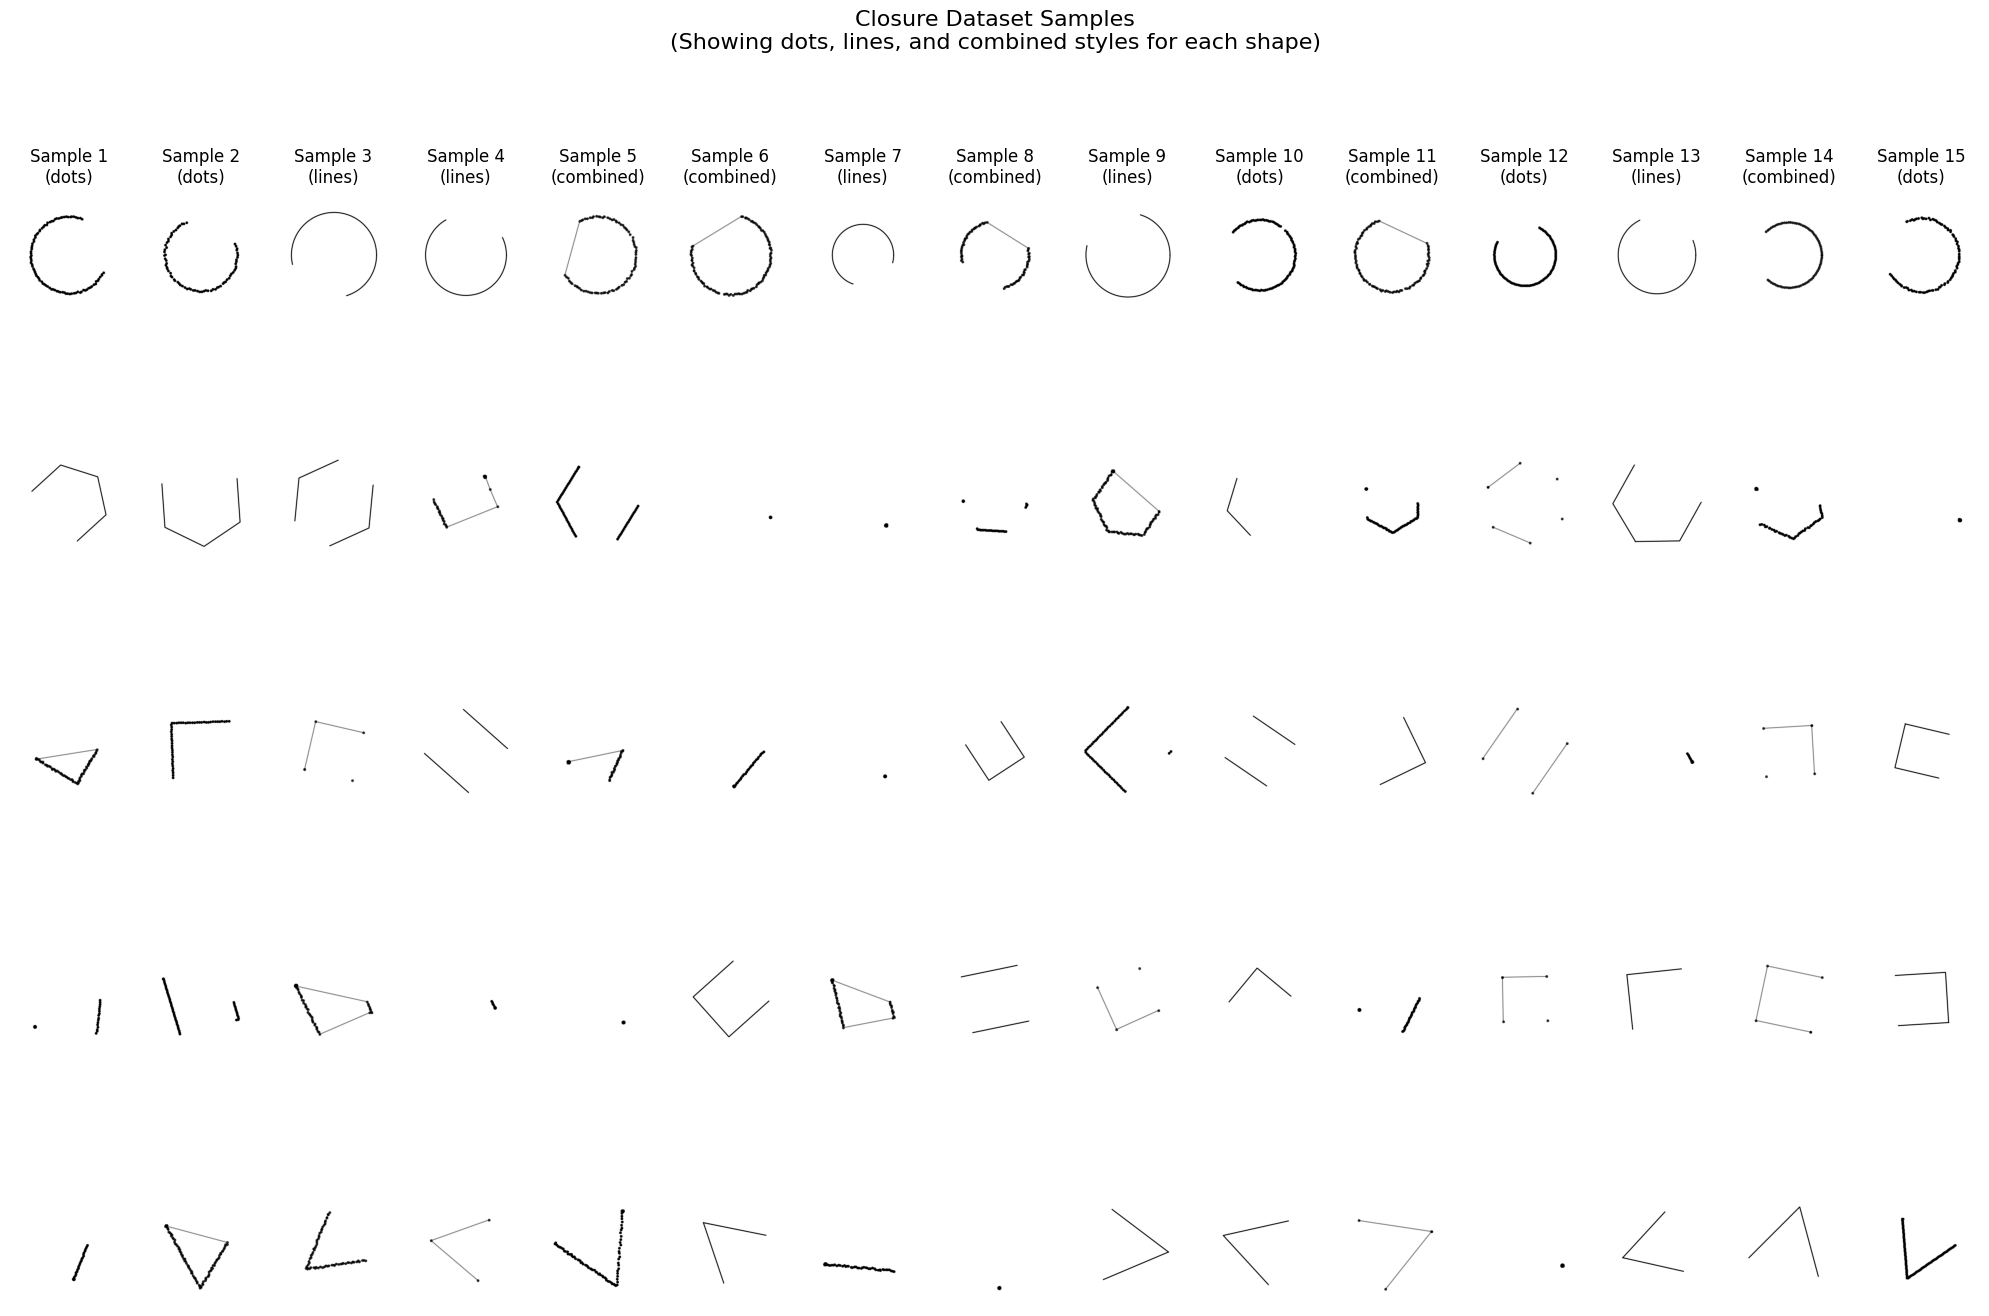

In [38]:
import glob

def display_sample_images(dataset_dir="closure_dataset", samples_per_class=15):
    shape_classes = sorted([d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))])

    num_rows = len(shape_classes)
    num_cols = samples_per_class
    plt.figure(figsize=(20, 15))

    for row, shape in enumerate(shape_classes):
        shape_dir = os.path.join(dataset_dir, shape)
        dot_images = glob.glob(os.path.join(shape_dir, f"{shape}_dots_*.png"))
        line_images = glob.glob(os.path.join(shape_dir, f"{shape}_lines_*.png"))
        combined_images = glob.glob(os.path.join(shape_dir, f"{shape}_combined_*.png"))

        num_each = samples_per_class // 3
        extra = samples_per_class % 3

        selected_images = (
            random.sample(dot_images, min(num_each + (extra > 0), len(dot_images))) +
            random.sample(line_images, min(num_each + (extra > 1), len(line_images))) +
            random.sample(combined_images, min(num_each, len(combined_images)))
        )

        while len(selected_images) < samples_per_class and (dot_images or line_images or combined_images):
            if dot_images:
                remaining_dots = [img for img in dot_images if img not in selected_images]
                if remaining_dots:
                    selected_images.append(random.choice(remaining_dots))
            elif line_images:
                remaining_lines = [img for img in line_images if img not in selected_images]
                if remaining_lines:
                    selected_images.append(random.choice(remaining_lines))
            elif combined_images:
                remaining_combined = [img for img in combined_images if img not in selected_images]
                if remaining_combined:
                    selected_images.append(random.choice(remaining_combined))

        random.shuffle(selected_images)

        for col, img_path in enumerate(selected_images[:samples_per_class]):
            plt.subplot(num_rows, num_cols, row * num_cols + col + 1)
            img = imread(img_path)
            plt.imshow(img)
            plt.axis('off')
            style = os.path.basename(img_path).split('_')[1]
            if col == 0:
                plt.ylabel(shape.capitalize(), fontsize=12, rotation=0, labelpad=50)
            if row == 0:
                plt.title(f'Sample {col+1}\n({style})', pad=10)

    plt.suptitle("Closure Dataset Samples\n(Showing dots, lines, and combined styles for each shape)",
                 fontsize=16, y=0.95)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

display_sample_images()

###Definition of Convolutional Neural Network Model and its Implementation

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1/25:
Train Loss: 3.2243 | Train Acc: 29.00%
Val Loss: 1.6001 | Val Acc: 34.00%
------------------------------------------------------------
Epoch 2/25:
Train Loss: 1.7063 | Train Acc: 39.00%
Val Loss: 1.3559 | Val Acc: 41.00%
------------------------------------------------------------
Epoch 3/25:
Train Loss: 1.2771 | Train Acc: 44.00%
Val Loss: 1.2111 | Val Acc: 49.00%
------------------------------------------------------------
Epoch 4/25:
Train Loss: 1.1624 | Train Acc: 47.00%
Val Loss: 1.1428 | Val Acc: 50.00%
------------------------------------------------------------
Epoch 5/25:
Train Loss: 1.0215 | Train Acc: 53.50%
Val Loss: 1.0527 | Val Acc: 50.00%
------------------------------------------------------------
Epoch 6/25:
Train Loss: 0.9730 | Train Acc: 58.75%
Val Loss: 0.9843 | Val Acc: 54.00%
------------------------------------------------------------
Epoch 7/25:
Train Loss: 0.9271 | Train Acc: 59.75%
Val Loss: 0.9505 | Val Acc: 61.00%
--------------------------------

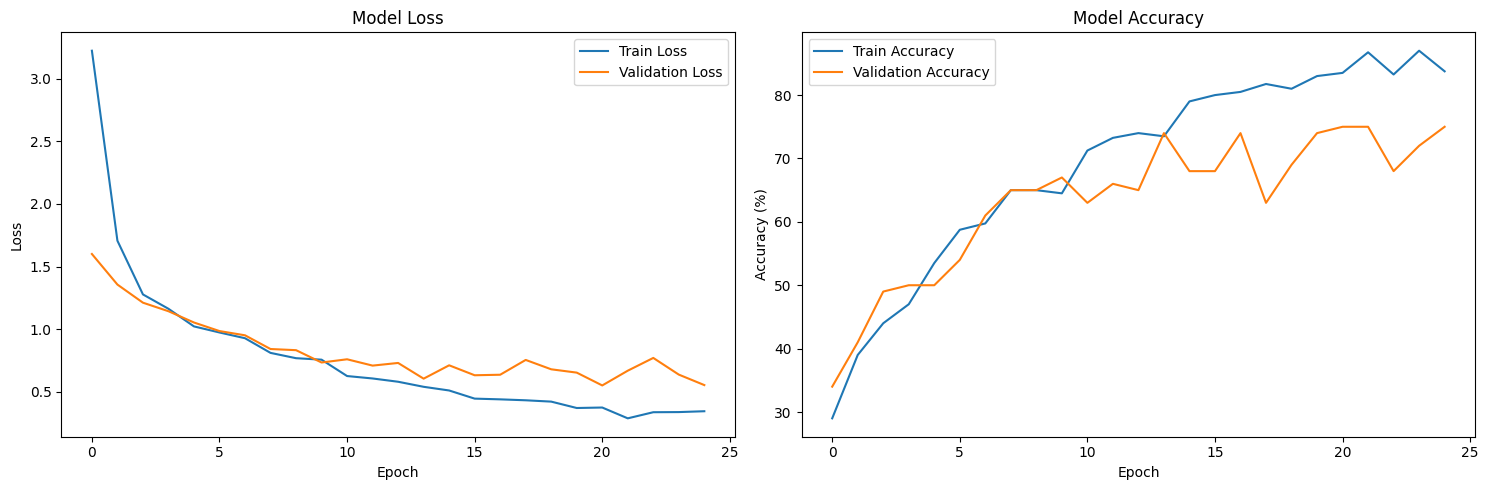


Final Test Accuracy: 75.00%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class ClosureShapeDataset(Dataset):
    def __init__(self, root_dir, transform=None, train=True):
        """
        Args:
            root_dir (string): Directory with all the images
            transform (callable, optional): Optional transform to be applied on a sample
            train (bool): If True, creates dataset from training set, otherwise creates from test set
        """
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.image_paths = []
        self.labels = []
        for class_name in self.classes:
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                self.image_paths.append(os.path.join(class_dir, img_name))
                self.labels.append(self.class_to_idx[class_name])

        # Split into train/test sets
        indices = list(range(len(self.image_paths)))
        train_indices, test_indices = train_test_split(indices, test_size=0.2, random_state=42, stratify=self.labels)
        selected_indices = train_indices if train else test_indices
        self.image_paths = [self.image_paths[i] for i in selected_indices]
        self.labels = [self.labels[i] for i in selected_indices]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

class ShapeCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(ShapeCNN, self).__init__()
        self.features = nn.Sequential(
            # First convolution block
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Second convolution block
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Third convolution block
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Fourth convolution block
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 6 * 6, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25, device='cuda'):
    model = model.to(device)
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total

        # Validation phase
        model.eval()
        running_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_loss = running_loss / len(val_loader)
        val_acc = 100. * correct / total

        # Record history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%')
        print('-' * 60)

    return history

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    # Plot loss
    ax1.plot(history['train_loss'], label='Train Loss')
    ax1.plot(history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracy
    ax2.plot(history['train_acc'], label='Train Accuracy')
    ax2.plot(history['val_acc'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Define transforms
transform = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

# Create datasets
train_dataset = ClosureShapeDataset('closure_dataset', transform=transform, train=True)
test_dataset = ClosureShapeDataset('closure_dataset', transform=transform, train=False)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Initialize model, criterion, and optimizer
model = ShapeCNN(num_classes=5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25, device=device)

# Plot training history
plot_training_history(history)

# Save the model
torch.save(model.state_dict(), 'shape_classifier.pth')

# Evaluate on test set
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

print(f'\nFinal Test Accuracy: {100. * correct / total:.2f}%')

